# Project 1: Machine Learning

#### Objectives
Using the provided dataset, you are asked to train a model that predicts a book’s rating. The project should include exploratory analysis of the data, feature engineering and selection, model training and evaluation and finally, deployment.

#### Dataset source
The dataset provided is a curation of Goodreads books (https://www.goodreads.com/) based on real user information. It can be used for many tasks like predicting a book’s rating or recommending new books.

#### Dataset attributes

1) bookID: A unique identification number for each book.
2) title: The name under which the book was published.
3) authors: The names of the authors of the book. Multiple authors are delimited by “/”.
4) average_rating: The average rating of the book received in total.
5) isbn: Another unique number to identify the book, known as the International Standard Book Number.
6) isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
7) language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.
8) num_pages: The number of pages the book contains.
9) ratings_count: The total number of ratings the book received.
10) text_reviews_count: The total number of written text reviews the book received.
11) publication_date: The date the book was published.
12) publisher: The name of the book publisher.

### Part 1 | General data exploring & data cleaning

#### Import librarys

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

#### Import data set

In [2]:
#check and correct separator
try:
    books = pd.read_csv("books.csv", sep=',')
except pd.errors.ParserError as e:
    print("ParserError:", e)
    print("Attempting to skip problematic lines...")
    books = pd.read_csv("books.csv", sep=',', error_bad_lines=False)

In [3]:
books = pd.read_csv("./books.csv", sep=',', encoding='utf-8')
books

bookID                                              title  \
0          1  Harry Potter and the Half-Blood Prince (Harry ...   
1          2  Harry Potter and the Order of the Phoenix (Har...   
2          4  Harry Potter and the Chamber of Secrets (Harry...   
3          5  Harry Potter and the Prisoner of Azkaban (Harr...   
4          8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...      ...                                                ...   
11122  45631   Expelled from Eden: A William T. Vollmann Reader   
11123  45633                        You Bright and Risen Angels   
11124  45634                    The Ice-Shirt (Seven Dreams #1)   
11125  45639                                        Poor People   
11126  45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   
1                             J.K. Rowling/Mary GrandPré            4.49   
2                                           J.K. Rowling            4.42   
3                             J.K. Rowling/Mary GrandPré            4.56   
4                             J.K. Rowling/Mary GrandPré            4.78   
...                                                  ...             ...   
11122  William T. Vollmann/Larry McCaffery/Michael He...            4.06   
11123                                William T. Vollmann            4.08   
11124                                William T. Vollmann            3.96   
11125                                William T. Vollmann            3.72   
11126                                         Mark Twain            3.91   

             isbn        isbn13 language_code    num_pages  ratings_count  \
0      0439785960  9.780440e+12           eng        652.0      2095690.0   
1      0439358078  9.780439e+12           eng        870.0      2153167.0   
2      0439554896  9.780440e+12           eng        352.0         6333.0   
3      043965548X  9.780440e+12           eng        435.0      2339585.0   
4      0439682584  9.780440e+12           eng       2690.0        41428.0   
...           ...           ...           ...          ...            ...   
11122  1560254416  9.781560e+12           eng        512.0          156.0   
11123  0140110879  9.780140e+12           eng        635.0          783.0   
11124  0140131965  9.780140e+12           eng        415.0          820.0   
11125  0060878827  9.780061e+12           eng        434.0          769.0   
11126  8497646983  9.788498e+12           spa        272.0          113.0   

       text_reviews_count publication_date        publisher;;;  
0                 27591.0        9/16/2006  Scholastic Inc.;;;  
1                 29221.0         9/1/2004  Scholastic Inc.;;;  
2                   244.0        11/1/2003       Scholastic;;;  
3                 36325.0         5/1/2004  Scholastic Inc.;;;  
4                   164.0        9/13/2004       Scholastic;;;  
...                   ...              ...                 ...  
11122                20.0       12/21/2004    Da Capo Press;;;  
11123                56.0        12/1/1988    Penguin Books;;;  
11124                95.0         8/1/1993    Penguin Books;;;  
11125               139.0        2/27/2007             Ecco;;;  
11126                12.0        5/28/2006    Edimat Libros;;;  

[11127 rows x 12 columns]

#### Basic Statistics

In [4]:
books.describe().T

count          mean           std           min  \
average_rating      11098.0  3.934580e+00  3.484479e-01  0.000000e+00   
isbn13              11098.0  9.759833e+12  4.434734e+11  8.987060e+09   
  num_pages         11098.0  3.365148e+02  2.412883e+02  0.000000e+00   
ratings_count       11098.0  1.798103e+04  1.126229e+05  0.000000e+00   
text_reviews_count  11098.0  5.431097e+02  2.579411e+03  0.000000e+00   

                             25%           50%           75%           max  
average_rating      3.770000e+00  3.960000e+00  4.140000e+00  5.000000e+00  
isbn13              9.780345e+12  9.780584e+12  9.780872e+12  9.790008e+12  
  num_pages         1.920000e+02  2.990000e+02  4.160000e+02  6.576000e+03  
ratings_count       1.042500e+02  7.480000e+02  5.016750e+03  4.597666e+06  
text_reviews_count  9.000000e+00  4.700000e+01  2.380000e+02  9.426500e+04

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11098 non-null  object 
 2   authors             11098 non-null  object 
 3   average_rating      11098 non-null  float64
 4   isbn                11098 non-null  object 
 5   isbn13              11098 non-null  float64
 6   language_code       11098 non-null  object 
 7     num_pages         11098 non-null  float64
 8   ratings_count       11098 non-null  float64
 9   text_reviews_count  11098 non-null  float64
 10  publication_date    11098 non-null  object 
 11  publisher;;;        11098 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.0+ MB


In [6]:
# Check null observations

k = pd.DataFrame()
k['books']= books.isnull().sum()
k

books
bookID                  0
title                  29
authors                29
average_rating         29
isbn                   29
isbn13                 29
language_code          29
  num_pages            29
ratings_count          29
text_reviews_count     29
publication_date       29
publisher;;;           29

In [7]:
# Drop lines without values for the target variable
books_cleaned = books.dropna(subset=['average_rating'])

In [8]:
# Remove "publisher;;;" from the end of the column and drop the original column
column_name = 'publisher;;;'
books_cleaned['publisher'] = books_cleaned[column_name].str.rstrip(';')
books_cleaned.drop(column_name, axis=1, inplace=True)

In [9]:
# Fixing dates
date_mapping = {
    '11/31/2000': '12/01/2001',
    '6/31/1982': '07/01/1982'
}
books_cleaned['publication_date'] = books_cleaned['publication_date'].replace(date_mapping)


# Formating date
column_name = 'publication_date'
books_cleaned.loc[:, column_name] = pd.to_datetime(books_cleaned[column_name], format='%m/%d/%Y', errors='coerce')

In [10]:
unique_language_codes = books_cleaned['language_code'].unique().tolist()
print(unique_language_codes)

['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm', 'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla', 'ale']


We observe that we have 4 different languages codes referring to English, so we are going to agruppate them.

In [11]:
# Create a dictionary to map values for replacement
language_mapping = {
    'eng-US': 'eng',
    'en-GB': 'eng',
    'en-CA': 'eng',
    'en-US': 'eng'
}

# Replace values in the 'language_code' column using the dictionary
books_cleaned['language_code'] = books_cleaned['language_code'].replace(language_mapping)

# Display the updated unique values in the 'language_code' column
unique_language_codes = books_cleaned['language_code'].unique().tolist()
print(unique_language_codes)

['eng', 'fre', 'spa', 'mul', 'grc', 'enm', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla', 'ale']


In [12]:
# Setting index
books_cleaned.reset_index(drop=True, inplace=True)
books_cleaned.set_index('bookID', inplace=True)

# Data set renaming
df = books_cleaned
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)
df.head()

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   
4       Harry Potter and the Chamber of Secrets (Harry...   
5       Harry Potter and the Prisoner of Azkaban (Harr...   
8       Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                           authors  average_rating        isbn        isbn13  \
bookID                                                                         
1       J.K. Rowling/Mary GrandPré            4.57  0439785960  9.780440e+12   
2       J.K. Rowling/Mary GrandPré            4.49  0439358078  9.780439e+12   
4                     J.K. Rowling            4.42  0439554896  9.780440e+12   
5       J.K. Rowling/Mary GrandPré            4.56  043965548X  9.780440e+12   
8       J.K. Rowling/Mary GrandPré            4.78  0439682584  9.780440e+12   

       language_code  num_pages  ratings_count  text_reviews_count  \
bookID                                                               
1                eng      652.0      2095690.0             27591.0   
2                eng      870.0      2153167.0             29221.0   
4                eng      352.0         6333.0               244.0   
5                eng      435.0      2339585.0             36325.0   
8                eng     2690.0        41428.0               164.0   

       publication_date        publisher  
bookID                                    
1            2006-09-16  Scholastic Inc.  
2            2004-09-01  Scholastic Inc.  
4            2003-11-01       Scholastic  
5            2004-05-01  Scholastic Inc.  
8            2004-09-13       Scholastic

*Total observations*

In [13]:
df.shape

(11098, 11)

### Part 2  | Exploration Data Analysis

#### Average Rating Dispersion

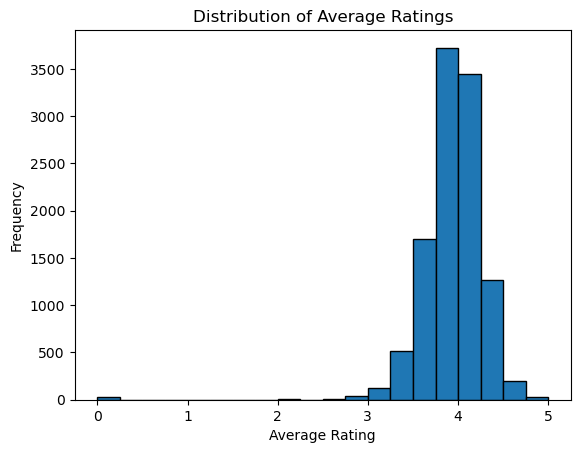

In [14]:
plt.hist(df['average_rating'], bins=20, edgecolor='k') 
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()

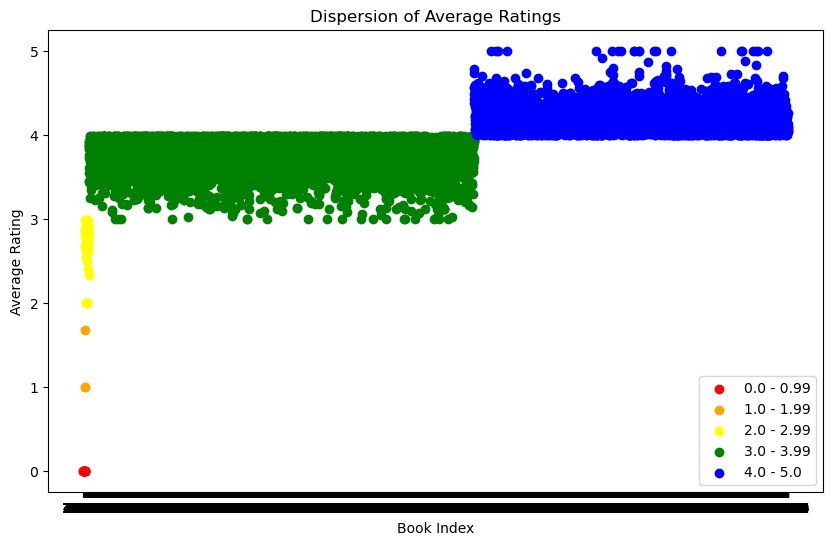

In [15]:
# Define the rating intervals and corresponding colors
intervals = [
    (0.0, 0.99),
    (1.0, 1.99),
    (2.0, 2.99),
    (3.0, 3.99),
    (4.0, 5.0)
]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Assign colors to ratings based on intervals
df['rating_interval'] = pd.cut(df['average_rating'], bins=[interval[0] for interval in intervals] + [5.0], labels=colors)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for color, interval in zip(colors, intervals):
    subset = books_cleaned[(df['average_rating'] >= interval[0]) & (df['average_rating'] <= interval[1])]
    plt.scatter(subset.index, subset['average_rating'], color=color, label=f'{interval[0]} - {interval[1]}')

plt.xlabel('Book Index')
plt.ylabel('Average Rating')
plt.title('Dispersion of Average Ratings')
plt.legend()
plt.show()

#### Classes comparation

In [16]:
# Count the number of observations in each interval
interval_counts = df['rating_interval'].value_counts().sort_index()

# Create a DataFrame to show the interval counts
interval_counts_df = pd.DataFrame({
    'Average Rating interval': [f'{interval[0]} - {interval[1]}' for interval in intervals],
    'Observation Count': interval_counts.values
})


# Display the interval counts DataFrame
print(interval_counts_df)

  Average Rating interval  Observation Count
0              0.0 - 0.99                  2
1              1.0 - 1.99                  7
2              2.0 - 2.99                 69
3              3.0 - 3.99               6268
4               4.0 - 5.0               4728


#### Insight
We find that the data set is highly unbalanced, where the majority of the observations obtained a rating higher than 3.

#### Correlation box

<Axes: >

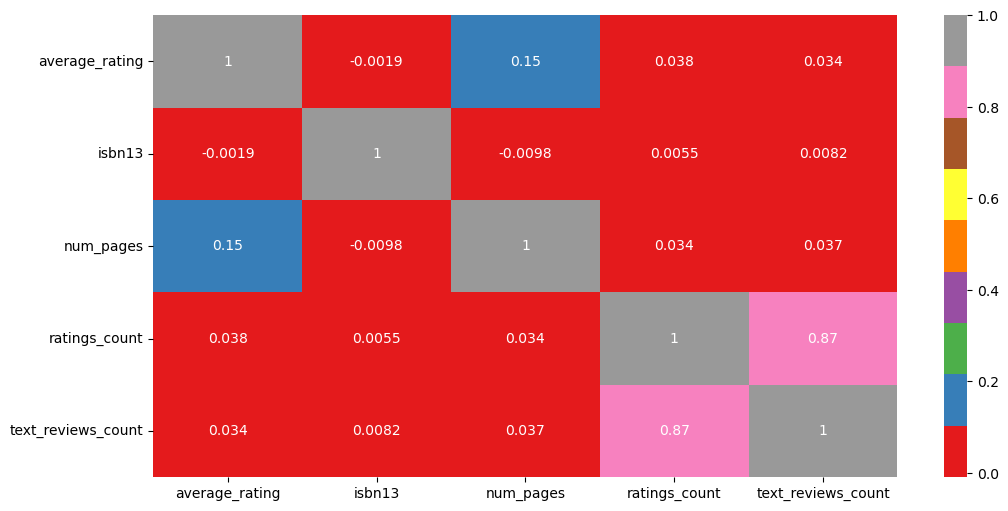

In [17]:
cor = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

#### Insight

We found a high correlaton between rating counts and text reviews counts. This is logical since the source of these variables is the same, it is the input of the users when they make an evaluation of the book.


#### Creation of new date variables to analyse

In [18]:
df['date'] = pd.to_datetime(df['publication_date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

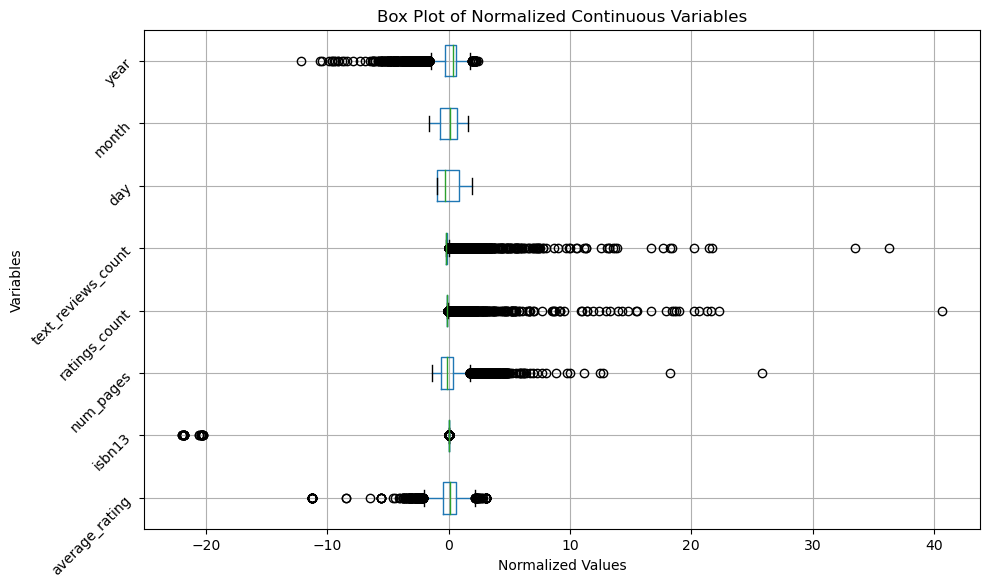

In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64'])

# Step 3: Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(continuous_vars)

# Convert normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=continuous_vars.columns)

# Step 4: Create Box Plot
plt.figure(figsize=(10, 6))
normalized_df.boxplot(rot=45, vert=False)
plt.title("Box Plot of Normalized Continuous Variables")
plt.xlabel("Normalized Values")
plt.ylabel("Variables")
plt.tight_layout()

plt.show()

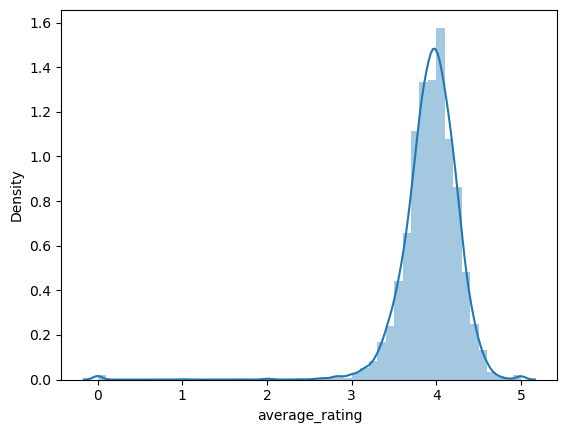

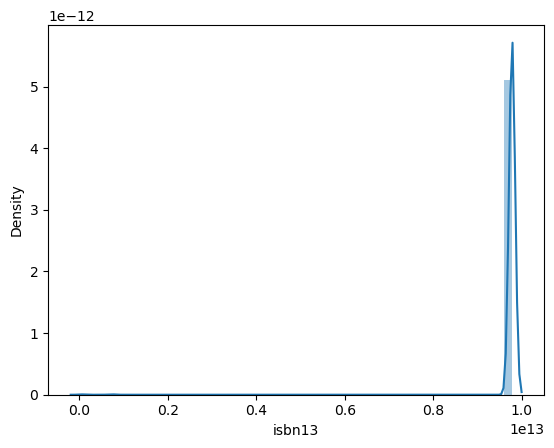

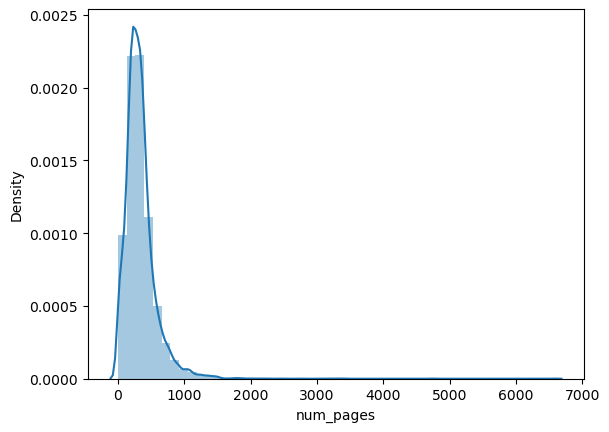

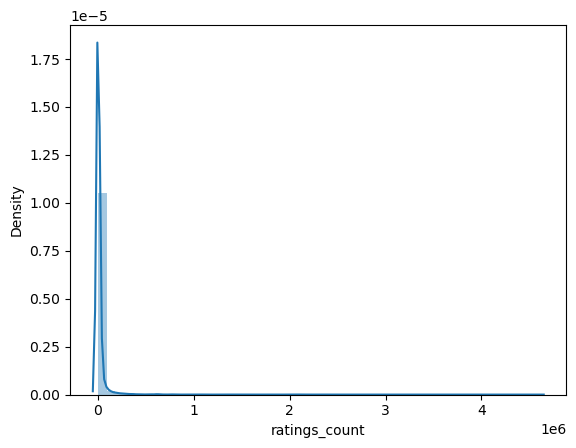

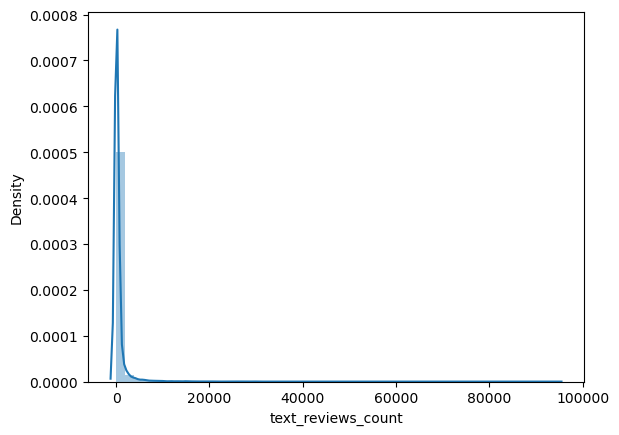

In [20]:
for col in df.select_dtypes('float'):
    plt.figure() 
    sns.distplot(df[col])

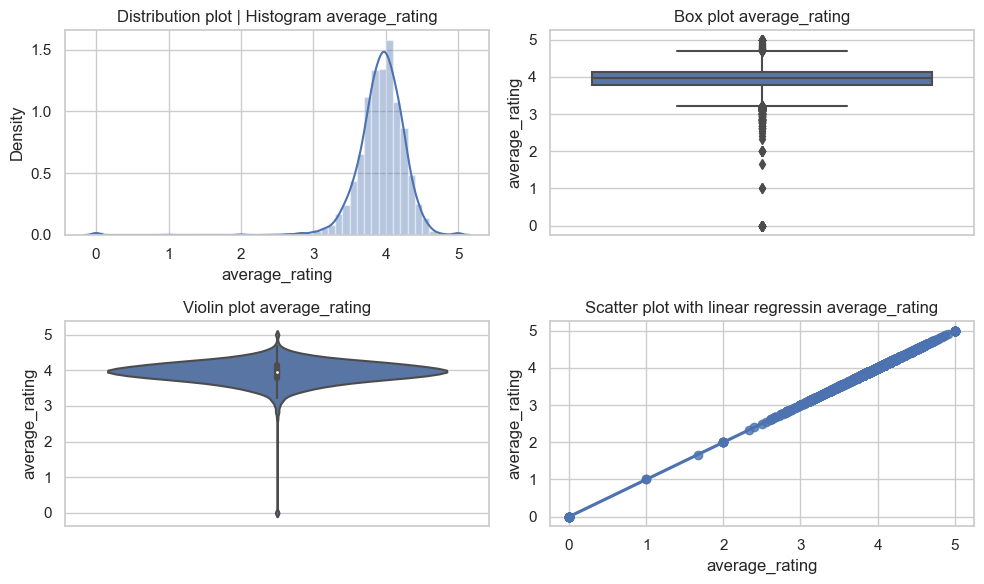

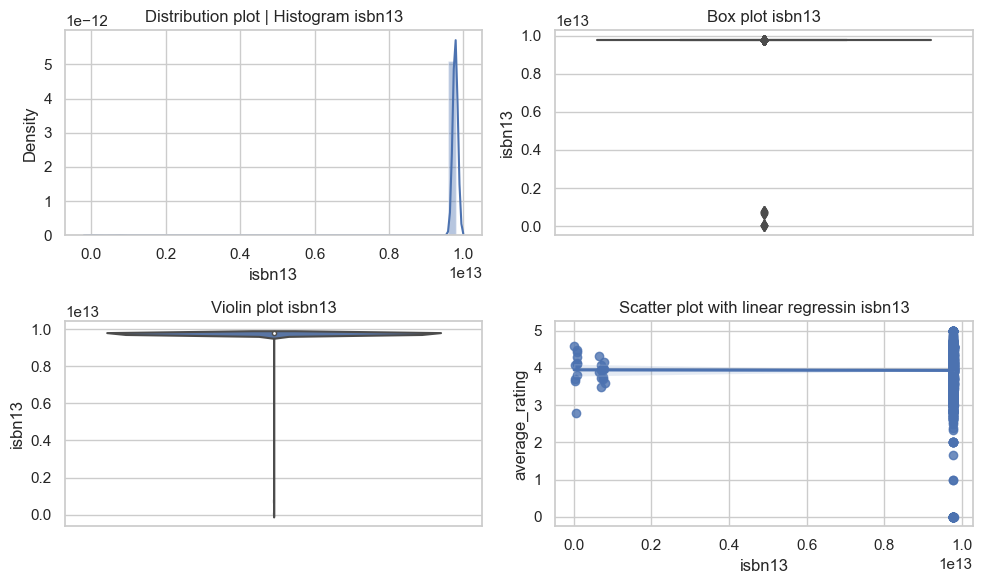

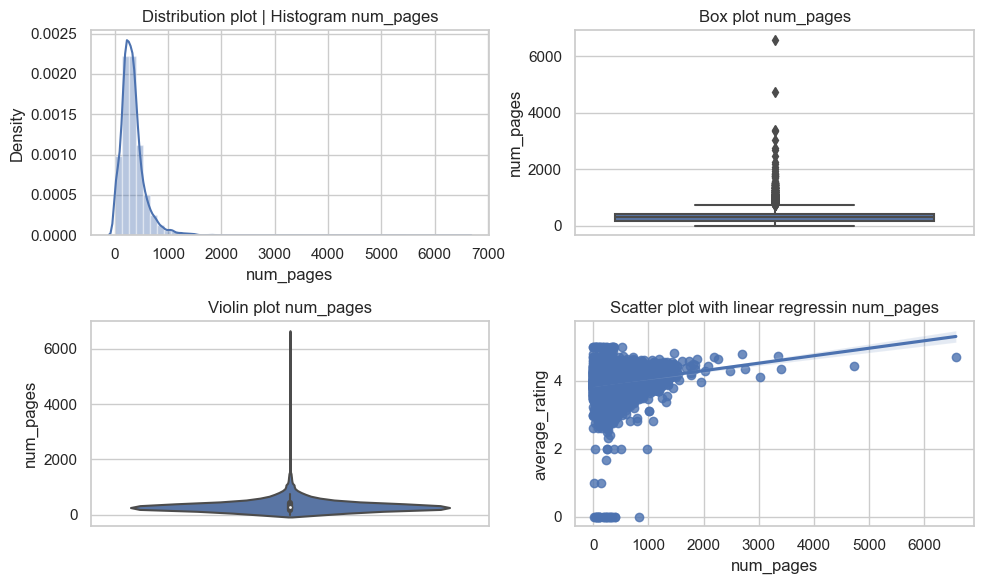

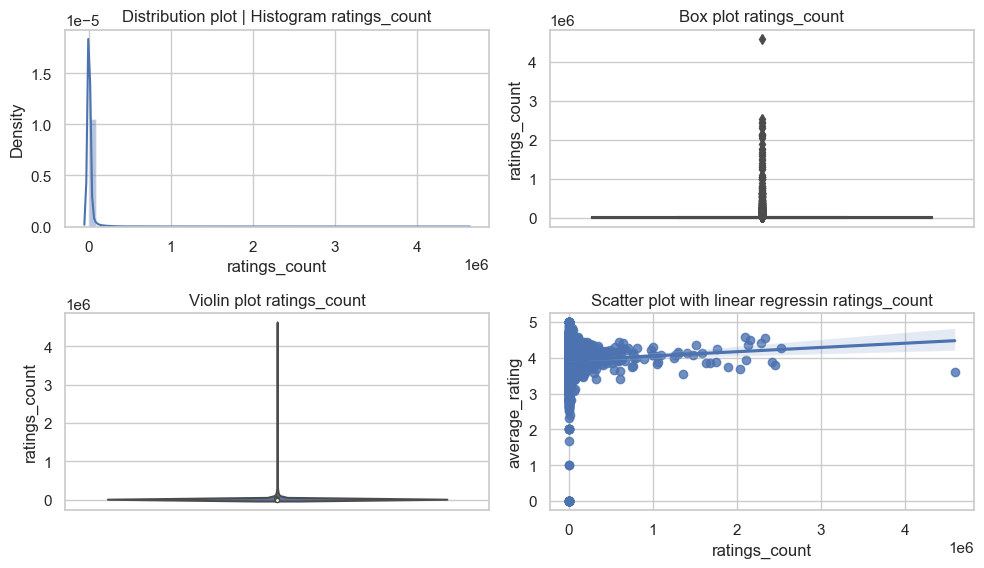

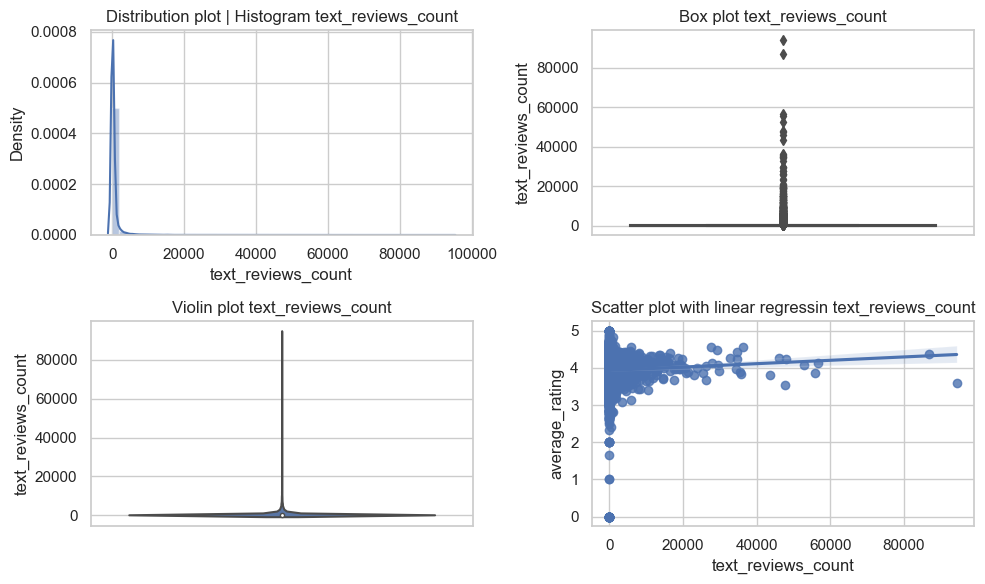

In [21]:
for col in df.select_dtypes('float'):

    plt.figure(figsize=(10, 6))  

    sns.set(style="whitegrid")  


    # Distribution plot (Histogram and density estimation)

    plt.subplot(2, 2, 1) 

    sns.distplot(df[col], hist=True, kde=True)  

    plt.title(f'Distribution plot | Histogram {col}')


    # Box plot

    plt.subplot(2, 2, 2)

    sns.boxplot(y=df[col])

    plt.title(f'Box plot {col}')


    # Violin plot

    plt.subplot(2, 2, 3)

    sns.violinplot(y=df[col])

    plt.title(f'Violin plot {col}')


    # Scatter plot with linear regression

    plt.subplot(2, 2, 4)

    sns.regplot(x=col, y='average_rating', data=df)  

    plt.title(f'Scatter plot with linear regressin {col}')


    plt.tight_layout()  

    plt.show()  

#### Top 10 authors with number of books receiving ratings ≥ 4

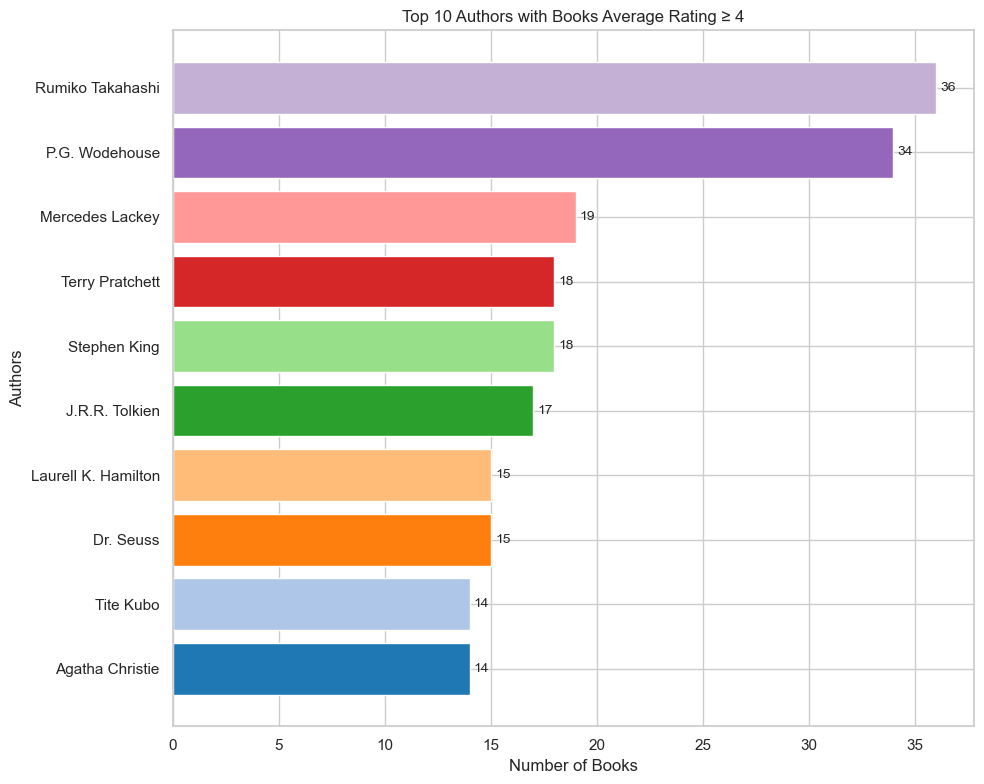

In [22]:
# Step 1: Filter and Group Data
filtered_data = df[df['average_rating'] >= 4]
author_counts = filtered_data['authors'].value_counts()

# Step 2: Get Top 10 Authors
top_10_authors = author_counts.head(10)

# Sort authors in ascending order by the number of books
top_10_authors = top_10_authors.sort_values()

# Generate a list of distinct colors for each author
num_authors = len(top_10_authors)
colors = plt.cm.tab20.colors[:num_authors]

# Step 3: Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_10_authors.index, top_10_authors.values, color=colors)
plt.title("Top 10 Authors with Books Average Rating ≥ 4")
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.tight_layout()

# Adding the number of books on each bar
for bar, value in zip(bars, top_10_authors.values):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, str(value), va='center', fontsize=10)

plt.show()

#### Bottom 5 Authors with Ratings ≤ 2

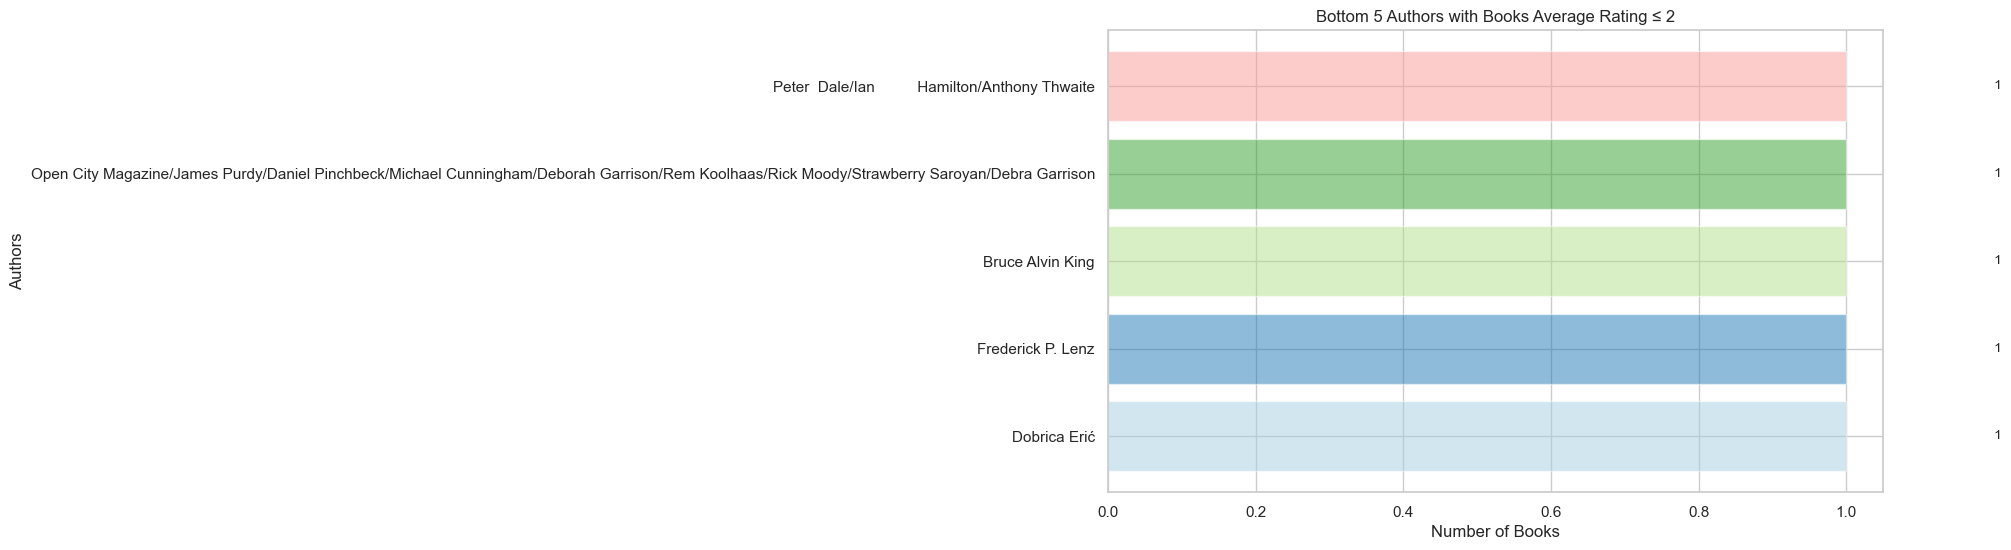

In [23]:
# Step 1: Filter and Group Data
filtered_data = books[books['average_rating'] <= 2]
author_counts = filtered_data['authors'].value_counts()

# Step 2: Get Bottom 5 Authors with Ratings ≤ 2
bottom_5_authors = author_counts.tail(5)

# Sort authors in ascending order by the number of books
bottom_5_authors = bottom_5_authors.sort_values()

# Step 2: Plot Bottom 5 Authors
plt.figure(figsize=(10, 6))
bottom_bars = plt.barh(bottom_5_authors.index, bottom_5_authors.values, color=plt.cm.Paired.colors[:len(bottom_5_authors)], alpha=0.5)

# Adding the number of books on each bottom bar
for bar, value in zip(bottom_bars, bottom_5_authors.values):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, str(value), va='center', fontsize=10)

plt.title("Bottom 5 Authors with Books Average Rating ≤ 2")
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.tight_layout()

plt.show()

We observe multiple authors are separated by "/". Does the participation of many authors affects the rating?

In [24]:
# Split the "authors" column by "/" and create new columns
authors_split = df['authors'].str.split("/", expand=True)
num_authors = authors_split.shape[1]

# Rename the remaining new columns to author_1, author_2, ..., author_N
new_column_names = [f"author_{i+1}" for i in range(num_authors)]
authors_split.columns = new_column_names

# Concatenate the original DataFrame with the new columns
books_with_authors = pd.concat([df[['average_rating', 'rating_interval']], authors_split], axis=1)

authors_split

author_1         author_2            author_3 author_4  \
bookID                                                                      
1              J.K. Rowling    Mary GrandPré                None     None   
2              J.K. Rowling    Mary GrandPré                None     None   
4              J.K. Rowling             None                None     None   
5              J.K. Rowling    Mary GrandPré                None     None   
8              J.K. Rowling    Mary GrandPré                None     None   
...                     ...              ...                 ...      ...   
45631   William T. Vollmann  Larry McCaffery  Michael Hemmingson     None   
45633   William T. Vollmann             None                None     None   
45634   William T. Vollmann             None                None     None   
45639   William T. Vollmann             None                None     None   
45641            Mark Twain             None                None     None   

       author_5 author_6 author_7 author_8 author_9 author_10  ... author_42  \
bookID                                                         ...             
1          None     None     None     None     None      None  ...      None   
2          None     None     None     None     None      None  ...      None   
4          None     None     None     None     None      None  ...      None   
5          None     None     None     None     None      None  ...      None   
8          None     None     None     None     None      None  ...      None   
...         ...      ...      ...      ...      ...       ...  ...       ...   
45631      None     None     None     None     None      None  ...      None   
45633      None     None     None     None     None      None  ...      None   
45634      None     None     None     None     None      None  ...      None   
45639      None     None     None     None     None      None  ...      None   
45641      None     None     None     None     None      None  ...      None   

       author_43 author_44 author_45 author_46 author_47 author_48 author_49  \
bookID                                                                         
1           None      None      None      None      None      None      None   
2           None      None      None      None      None      None      None   
4           None      None      None      None      None      None      None   
5           None      None      None      None      None      None      None   
8           None      None      None      None      None      None      None   
...          ...       ...       ...       ...       ...       ...       ...   
45631       None      None      None      None      None      None      None   
45633       None      None      None      None      None      None      None   
45634       None      None      None      None      None      None      None   
45639       None      None      None      None      None      None      None   
45641       None      None      None      None      None      None      None   

       author_50 author_51  
bookID                      
1           None      None  
2           None      None  
4           None      None  
5           None      None  
8           None      None  
...          ...       ...  
45631       None      None  
45633       None      None  
45634       None      None  
45639       None      None  
45641       None      None  

[11098 rows x 51 columns]

In [25]:
books_with_authors['collaboration'] = ~(authors_split.iloc[:, 1:].isnull().all(axis=1))
# Count observations in each ratings group
books_with_authors_count = books_with_authors['collaboration'].value_counts().sort_index()

# Print the counts for both groups
print("books_with_authors_count")
print(books_with_authors_count)


# Count the non-null values for each observation along the columns
authors_split['authors_count'] = authors_split.count(axis=1)

# Concatenate the original DataFrame with the new columns
df = pd.concat([df, books_with_authors[['collaboration', 'author_1']], authors_split['authors_count']], axis=1) 
df

books_with_authors_count
False    6549
True     4549
Name: collaboration, dtype: int64


title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   
4       Harry Potter and the Chamber of Secrets (Harry...   
5       Harry Potter and the Prisoner of Azkaban (Harr...   
8       Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...                                                   ...   
45631    Expelled from Eden: A William T. Vollmann Reader   
45633                         You Bright and Risen Angels   
45634                     The Ice-Shirt (Seven Dreams #1)   
45639                                         Poor People   
45641                         Las aventuras de Tom Sawyer   

                                                  authors  average_rating  \
bookID                                                                      
1                              J.K. Rowling/Mary GrandPré            4.57   
2                              J.K. Rowling/Mary GrandPré            4.49   
4                                            J.K. Rowling            4.42   
5                              J.K. Rowling/Mary GrandPré            4.56   
8                              J.K. Rowling/Mary GrandPré            4.78   
...                                                   ...             ...   
45631   William T. Vollmann/Larry McCaffery/Michael He...            4.06   
45633                                 William T. Vollmann            4.08   
45634                                 William T. Vollmann            3.96   
45639                                 William T. Vollmann            3.72   
45641                                          Mark Twain            3.91   

              isbn        isbn13 language_code  num_pages  ratings_count  \
bookID                                                                     
1       0439785960  9.780440e+12           eng      652.0      2095690.0   
2       0439358078  9.780439e+12           eng      870.0      2153167.0   
4       0439554896  9.780440e+12           eng      352.0         6333.0   
5       043965548X  9.780440e+12           eng      435.0      2339585.0   
8       0439682584  9.780440e+12           eng     2690.0        41428.0   
...            ...           ...           ...        ...            ...   
45631   1560254416  9.781560e+12           eng      512.0          156.0   
45633   0140110879  9.780140e+12           eng      635.0          783.0   
45634   0140131965  9.780140e+12           eng      415.0          820.0   
45639   0060878827  9.780061e+12           eng      434.0          769.0   
45641   8497646983  9.788498e+12           spa      272.0          113.0   

        text_reviews_count publication_date        publisher rating_interval  \
bookID                                                                         
1                  27591.0       2006-09-16  Scholastic Inc.            blue   
2                  29221.0       2004-09-01  Scholastic Inc.            blue   
4                    244.0       2003-11-01       Scholastic            blue   
5                  36325.0       2004-05-01  Scholastic Inc.            blue   
8                    164.0       2004-09-13       Scholastic            blue   
...                    ...              ...              ...             ...   
45631                 20.0       2004-12-21    Da Capo Press            blue   
45633                 56.0       1988-12-01    Penguin Books            blue   
45634                 95.0       1993-08-01    Penguin Books           green   
45639                139.0       2007-02-27             Ecco           green   
45641                 12.0       2006-05-28    Edimat Libros           green   

             date  day  month  year  collaboration             author_1  \
bookID                                                                    
1      2006-09-16   16      9  2006           True         J.K. Rowling   
2

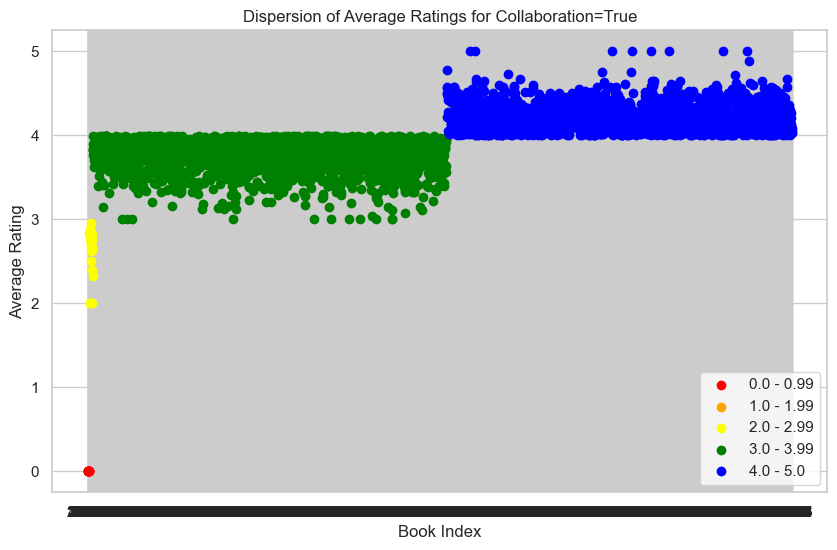

In [26]:
# Filter data for collaboration = True
df_collaboration_true = books_with_authors[books_with_authors['collaboration'] == True]

# Filter data for collaboration = False
df_collaboration_false = books_with_authors[books_with_authors['collaboration'] == False]

# Define the rating intervals and corresponding colors
intervals = [
    (0.0, 0.99),
    (1.0, 1.99),
    (2.0, 2.99),
    (3.0, 3.99),
    (4.0, 5.0)
]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Create a scatter plot for collaboration = True
plt.figure(figsize=(10, 6))
for color, interval in zip(colors, intervals):
    subset = df_collaboration_true[(df_collaboration_true['average_rating'] >= interval[0]) & (df_collaboration_true['average_rating'] <= interval[1])]
    plt.scatter(subset.index, subset['average_rating'], color=color, label=f'{interval[0]} - {interval[1]}')

plt.xlabel('Book Index')
plt.ylabel('Average Rating')
plt.title('Dispersion of Average Ratings for Collaboration=True')
plt.legend()
plt.show()

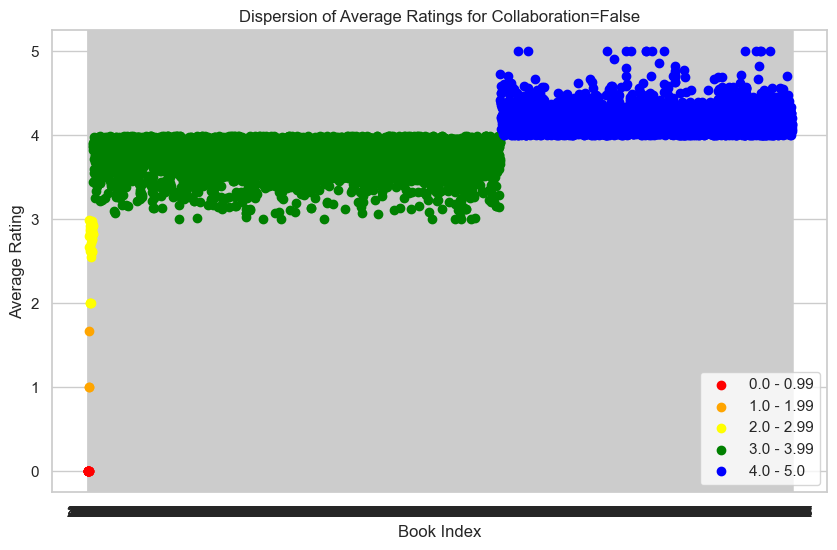

In [27]:
# Create a scatter plot for collaboration = False
plt.figure(figsize=(10, 6))
for color, interval in zip(colors, intervals):
    subset = df_collaboration_false[(df_collaboration_false['average_rating'] >= interval[0]) & (df_collaboration_false['average_rating'] <= interval[1])]
    plt.scatter(subset.index, subset['average_rating'], color=color, label=f'{interval[0]} - {interval[1]}')

plt.xlabel('Book Index')
plt.ylabel('Average Rating')
plt.title('Dispersion of Average Ratings for Collaboration=False')
plt.legend()
plt.show()

We found out that there where several publishers on the same bussiness group but with different names, causing a big cardinality.

In [28]:
unique_publishers = df['publisher'].nunique()
print(f"Number of unique publishers: {unique_publishers}")
# there is a high cardinality here we need to reduce it.

publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(20))

Number of unique publishers: 2286
Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   148
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Scribner                         73
Oxford University Press          73
W. W. Norton  Company            68
Name: publisher, dtype: int64


In [29]:
# Open the file in read mode
with open("./publisher_mapping.txt", "r") as file:
   # Initialize an empty dictionary
    publisher_mapping = {}
    
    # Read each line of the file
    for line in file:
        # Split the line into publisher name and abbreviation using the ":" separator
        parts = line.strip().split(":")
        
        # Check if there are at least two parts (publisher name and abbreviation)
        if len(parts) >= 2:
            publisher_name = parts[0].strip()
            abbreviation = parts[1].strip()
            
            # Add the publisher name and abbreviation to the dictionary
            publisher_mapping[publisher_name] = abbreviation
        else:
            # Handle lines with unexpected format (print a warning or skip)
            print(f"Warning: Line has unexpected format: {line}")

In [30]:
df['publisher_str'] = df['publisher'].str.split().str[0]

# Apply the mapping
df['publisher_general'] = df['publisher'].map(publisher_mapping).fillna(df['publisher_str'])
df = df.drop("publisher_str", axis=1)
df

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   
4       Harry Potter and the Chamber of Secrets (Harry...   
5       Harry Potter and the Prisoner of Azkaban (Harr...   
8       Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...                                                   ...   
45631    Expelled from Eden: A William T. Vollmann Reader   
45633                         You Bright and Risen Angels   
45634                     The Ice-Shirt (Seven Dreams #1)   
45639                                         Poor People   
45641                         Las aventuras de Tom Sawyer   

                                                  authors  average_rating  \
bookID                                                                      
1                              J.K. Rowling/Mary GrandPré            4.57   
2                              J.K. Rowling/Mary GrandPré            4.49   
4                                            J.K. Rowling            4.42   
5                              J.K. Rowling/Mary GrandPré            4.56   
8                              J.K. Rowling/Mary GrandPré            4.78   
...                                                   ...             ...   
45631   William T. Vollmann/Larry McCaffery/Michael He...            4.06   
45633                                 William T. Vollmann            4.08   
45634                                 William T. Vollmann            3.96   
45639                                 William T. Vollmann            3.72   
45641                                          Mark Twain            3.91   

              isbn        isbn13 language_code  num_pages  ratings_count  \
bookID                                                                     
1       0439785960  9.780440e+12           eng      652.0      2095690.0   
2       0439358078  9.780439e+12           eng      870.0      2153167.0   
4       0439554896  9.780440e+12           eng      352.0         6333.0   
5       043965548X  9.780440e+12           eng      435.0      2339585.0   
8       0439682584  9.780440e+12           eng     2690.0        41428.0   
...            ...           ...           ...        ...            ...   
45631   1560254416  9.781560e+12           eng      512.0          156.0   
45633   0140110879  9.780140e+12           eng      635.0          783.0   
45634   0140131965  9.780140e+12           eng      415.0          820.0   
45639   0060878827  9.780061e+12           eng      434.0          769.0   
45641   8497646983  9.788498e+12           spa      272.0          113.0   

        text_reviews_count publication_date        publisher rating_interval  \
bookID                                                                         
1                  27591.0       2006-09-16  Scholastic Inc.            blue   
2                  29221.0       2004-09-01  Scholastic Inc.            blue   
4                    244.0       2003-11-01       Scholastic            blue   
5                  36325.0       2004-05-01  Scholastic Inc.            blue   
8                    164.0       2004-09-13       Scholastic            blue   
...                    ...              ...              ...             ...   
45631                 20.0       2004-12-21    Da Capo Press            blue   
45633                 56.0       1988-12-01    Penguin Books            blue   
45634                 95.0       1993-08-01    Penguin Books           green   
45639                139.0       2007-02-27             Ecco           green   
45641                 12.0       2006-05-28    Edimat Libros           green   

             date  day  month  year  collaboration             author_1  \
bookID                                                                    
1      2006-09-16   16      9  2006           True         J.K. Rowling   
2

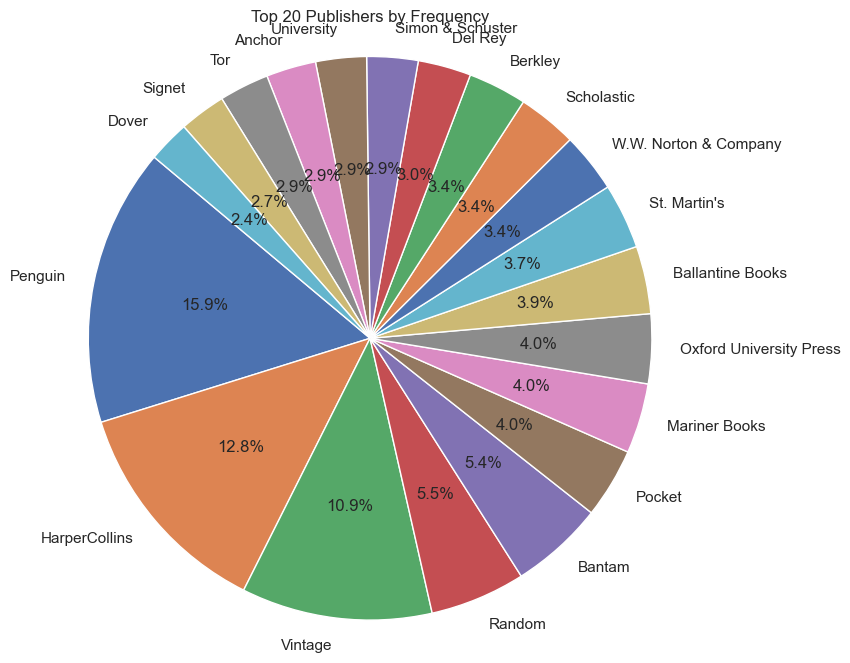

In [31]:
# 20 top publishers
top_publishers = df['publisher_general'].value_counts().head(20)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 20 Publishers by Frequency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Univariate analysis
The objective is to understand the distribution of each variable to determine if it will be included in the model.

*Number of pages*

<Axes: xlabel='num_pages', ylabel='Density'>

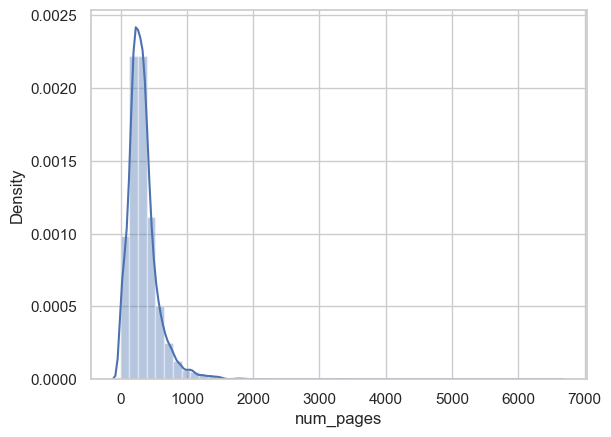

In [32]:
sns.distplot(df.num_pages)

Most books hast less than 1000 pages.

*Language*

In [33]:
fig = px.histogram(books_cleaned, x='language_code', color='language_code', title='Histogram of language_code Column')
fig.show()

We can see here that english is clearly dominating we will just need to check later the variablity of every langauge code comparing to the target.

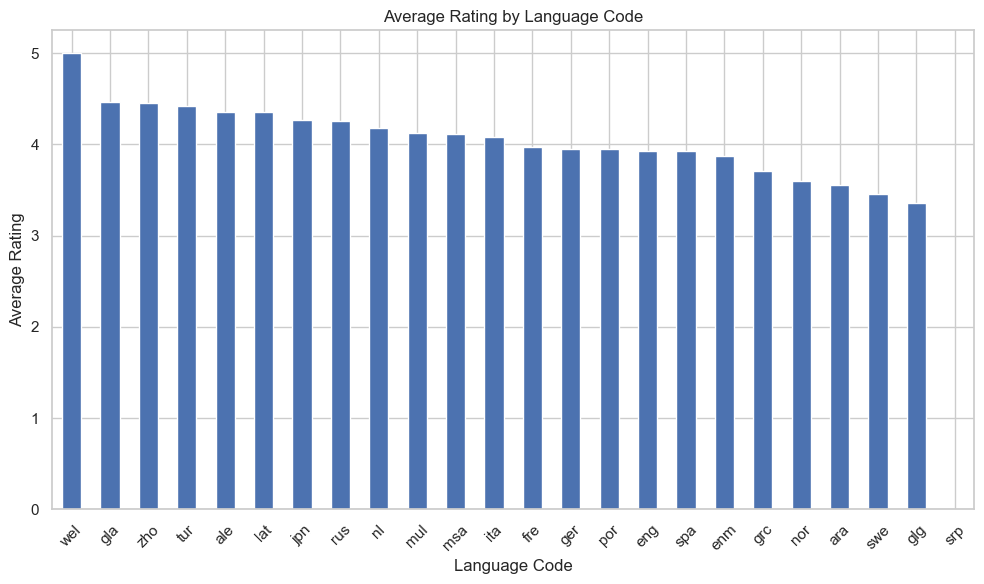

In [34]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
df.groupby('language_code')['average_rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Language Code')
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

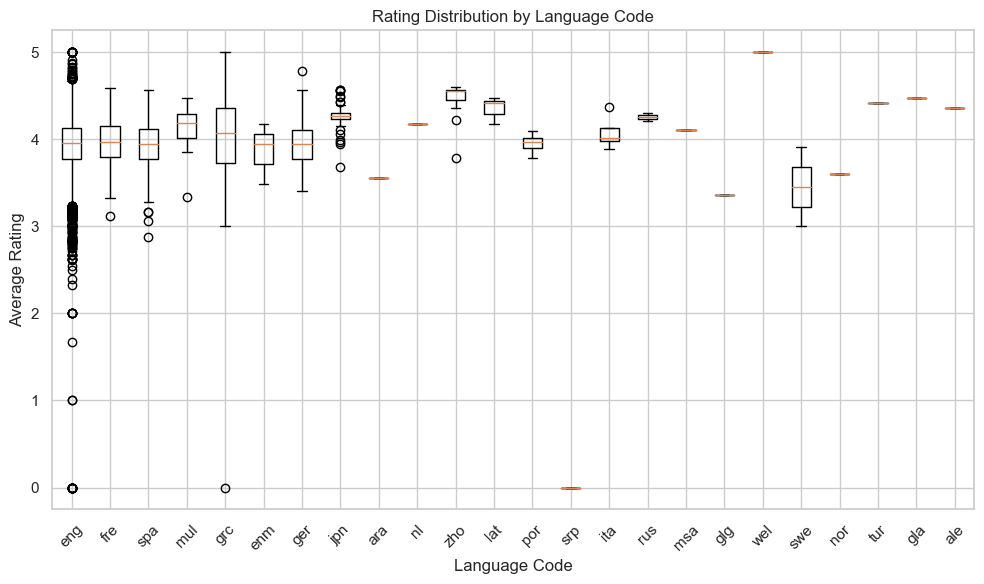

In [35]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['language_code'] == code]['average_rating'] for code in df['language_code'].unique()])
plt.title('Rating Distribution by Language Code')
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.xticks(range(1, len(df['language_code'].unique()) + 1), df['language_code'].unique(), rotation=45)
plt.tight_layout()
plt.show()

*Publication year*

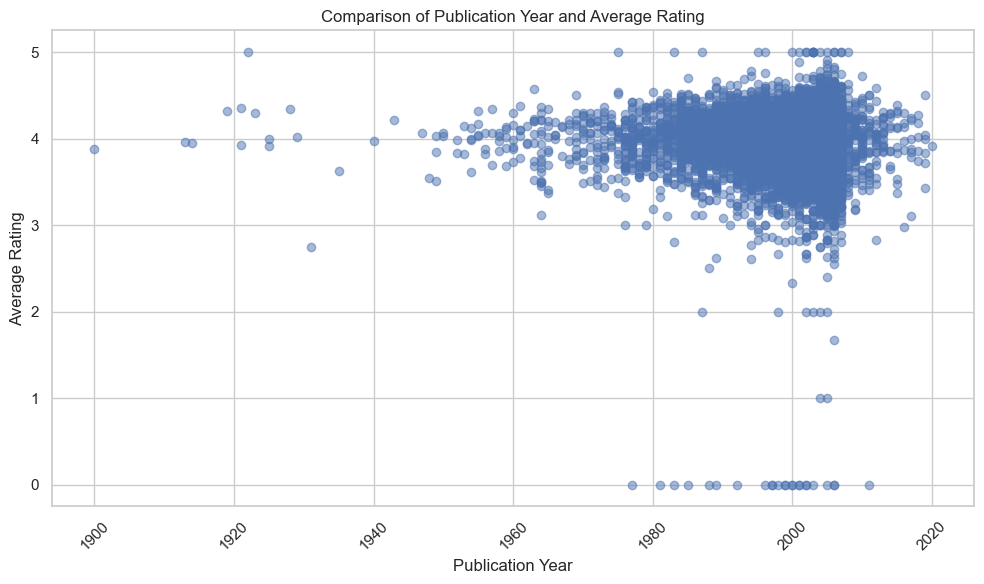

In [36]:
df['publication_year'] = df['publication_date'].dt.year

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['publication_year'], df['average_rating'], alpha=0.5)

plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.title('Comparison of Publication Year and Average Rating')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop the temporary 'publication_year' column
df.drop(columns='publication_year', inplace=True)

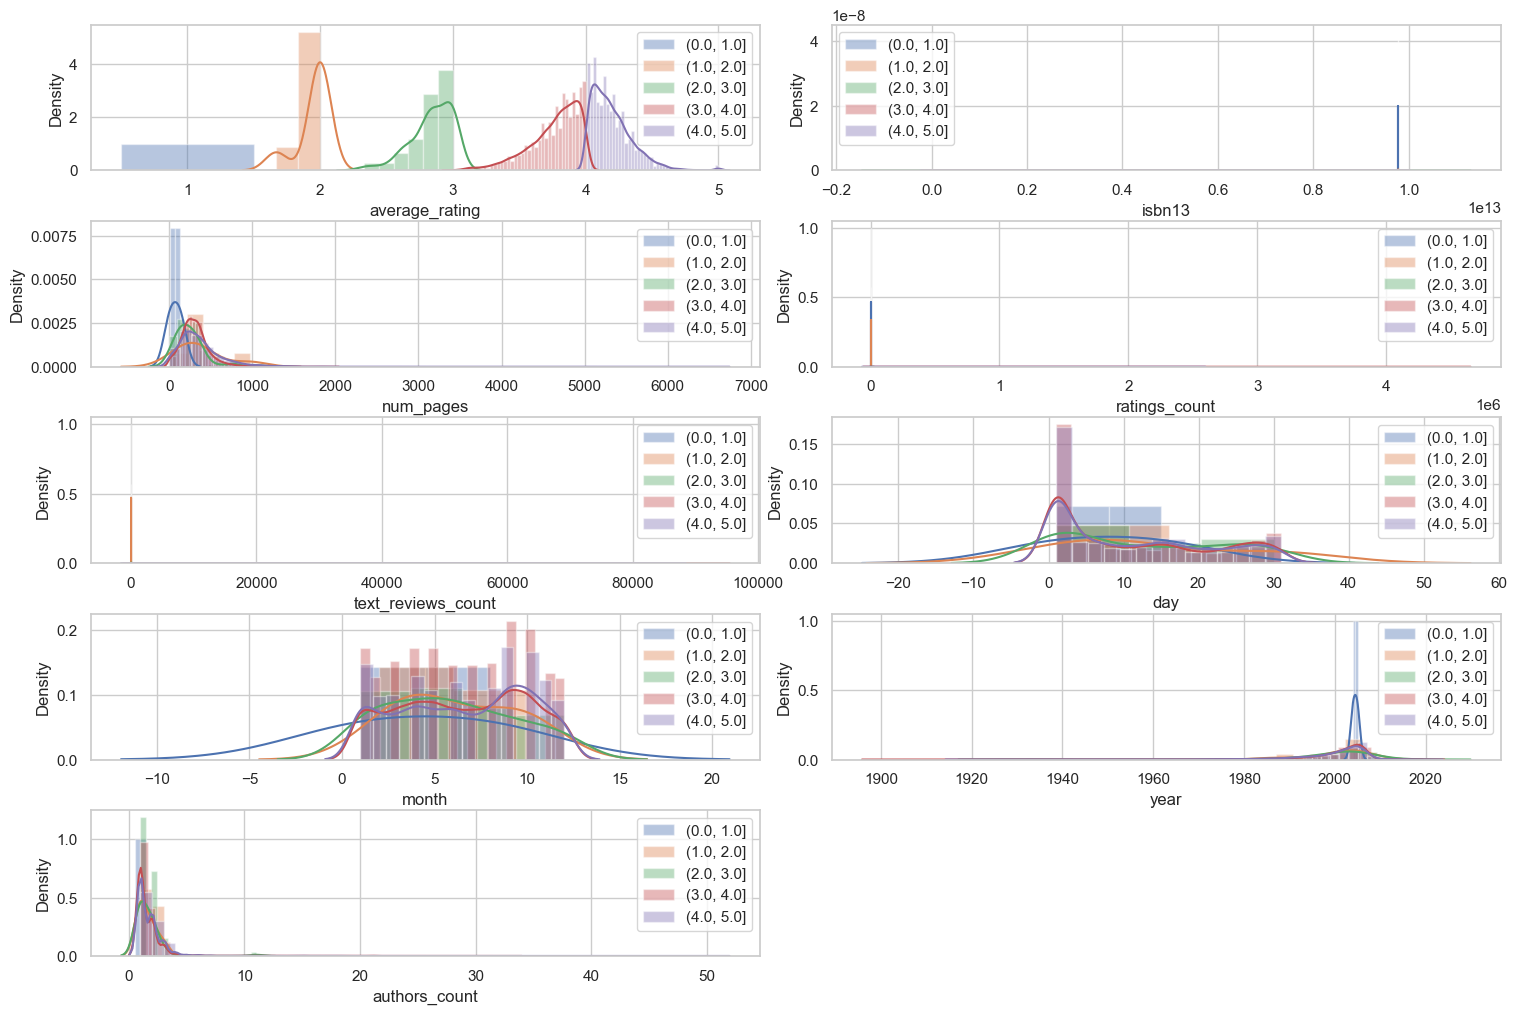

In [37]:
# Define the boundaries of the intervals
bins = np.arange(0, 6, 1)
# Add the "bins" column based on the "ratings" column
df['interval'] = pd.cut(df['average_rating'], bins=bins)
df['interval'] = df['interval'].astype(str)

ratings_very_poor = df[df['interval'] == '(0, 1]']
ratings_poor = df[df['interval'] == '(1, 2]']
ratings_fair_poor = df[df['interval'] == '(2, 3]']
ratings_fair_good = df[df['interval'] == '(3, 4]']
ratings_excellent = df[df['interval'] == '(4, 5]']
# List of columns with float type in the DataFrame df
float_columns = df.select_dtypes(['float64', 'int64']).columns

# Calculate the number of subplots required based on the number of columns
num_subplots = len(float_columns)
num_cols = 2  # Define the number of columns you want in each row

# Calculate the number of rows based on the number of subplots and columns
num_rows = (num_subplots + num_cols - 1) // num_cols

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

fig.tight_layout()

# Loop through columns and subplots
for i, col in enumerate(float_columns):
    row_idx = i // num_cols  # Current row
    col_idx = i % num_cols   # Current column
    
    ax = axes[row_idx, col_idx]  # Select the current subplot
    
    # Use a context to ignore specific warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.distplot(ratings_very_poor[col], label='(0.0, 1.0]', ax=ax)
        sns.distplot(ratings_poor[col], label='(1.0, 2.0]', ax=ax)
        sns.distplot(ratings_fair_poor[col], label='(2.0, 3.0]', ax=ax)
        sns.distplot(ratings_fair_good[col], label='(3.0, 4.0]', ax=ax)
        sns.distplot(ratings_excellent[col], label='(4.0, 5.0]', ax=ax)
        ax.legend()
    

# Remove unused subplots if any
if num_subplots < (num_rows * num_cols):
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Display the plot
plt.show()

_num_pages_
Based on the plot above, it is evident that the page number has an influence on the average rating as there is a shift between the Gaussian curves of each review type.

_ratings_count_
According to the ratings counts plot, a notable observation is that reviews with a "Poor" rating exhibit significantly lower or nearly negligible rating counts when compared to those with "Excellent" ratings.

_day_
The first day of the month exhibits a prominent peak in the Gaussian-like curve in contrast to the other days of the month. This could be hypothesized as follows: People might be inclined to make more purchases or engage more with a product or service at the beginning of the month due to the receipt of their salaries.

_month_
The pronounced peak observed in the ninth month holds a compelling explanation grounded in two key factors. First, it aligns with the strategic timing that authors and publishers often adopt, releasing their books in sync with the onset of the autumn season. This strategic decision is especially prominent as the year-end holidays draw near, capitalizing on increased readership during the festive period. Second, this temporal alignment results in an observable surge in positive reviews, likely influenced by the heightened availability and consumption of new literary works. By conducting temporal analysis and evaluating the sentiment dynamics within this time frame, it becomes evident that this phenomenon can be attributed to the interplay of seasonal book releases and the subsequent reader engagement patterns.

_num_pages_
First of all we can't say that when ever the num pages is inceasing the average_rating is increasing. We can notice that is centred in between 0-1000 number of pages which we need to invastigat more that part which means add another variable to the plot

_language_code_
We can notice here that we can reduce the dimensionality of the language code by what by the number of books that we have in that language which means we can try to merge some languages together.

_text review counts_
We can notice here thath the most region that is contorbuting for the average rating the most blue one with the log text reveiws count 3.75 and the average rating of 4.09.

### Part 3 | PRE-PROCESSING AND FEATURE ENGINEERING

In [38]:
df.dropna(subset=['num_pages', 'ratings_count', 'text_reviews_count'], inplace=True)

New variable: *book type* -> represents either if a single book or a collection.

In [39]:
def check_book_type(title):
    # Some patterns and keywords that are often present in titles of multiple books
    keywords = ['set', 'collection', 'boxed', 'volume', 'volumes', 'trilogy', '#1-', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', 'volume i', 'volume ii', '1-', '2-', '3-', '4-', '5-', '6-', '7-', '8-', 'series', '/']
    for keyword in keywords:
        if keyword in title.lower():
            return True
    return False

df['collection'] = df['title'].apply(check_book_type)

New variable: *lang_code_new* -> groups languages with less than 15 observations as others.

In [40]:
# Count the number of observations per language_code
language_counts = df['language_code'].value_counts()
 

# Create a new column lang_code_new
# If the observation count is less than 2, assign 'others'
# Otherwise, keep the value of language_code
df['lang_code_new'] = df['language_code'].apply(lambda x: 'others' if language_counts[x] < 15 else x)

New variable: _genre_ 

We are adding here the type variable because we know that it's important to use such a variable and it's going to help in our model performance

In [41]:
import gzip

json_data_list = []

# Open the Gzip file in binary mode for reading
with gzip.open('goodreads_book_genres_initial.json.gz', 'rb') as json_file:
    for line in json_file:
        # Decode each line and load the JSON
        json_data = json.loads(line.decode('utf-8'))
        json_data_list.append(json_data)

# Convert the list of JSON objects into a DataFrame
json_df = pd.DataFrame(json_data_list)

# Rename index 
json_df = json_df.rename(columns={'book_id': 'bookID'})
json_df.set_index('bookID', inplace=True)

json_df

genres
bookID                                                     
5333265       {'history, historical fiction, biography': 1}
1333909   {'fiction': 219, 'history, historical fiction,...
7327624   {'fantasy, paranormal': 31, 'fiction': 8, 'mys...
6066819   {'fiction': 555, 'romance': 23, 'mystery, thri...
287140                                   {'non-fiction': 3}
...                                                     ...
3084038   {'non-fiction': 5, 'history, historical fictio...
26168430  {'mystery, thriller, crime': 4, 'children': 1,...
2342551   {'poetry': 14, 'children': 7, 'young-adult': 1...
22017381     {'romance': 13, 'mystery, thriller, crime': 2}
11419866                      {'romance': 19, 'fiction': 4}

[2360655 rows x 1 columns]

In [42]:
# Merge the DataFrames using the index
df = pd.merge(df, json_df, left_index=True, right_index=True, how="left")

# Define the get_max_key function
def get_max_key(d):
    if isinstance(d, dict): 
        if d:  
            return max(d, key=d.get)
    return None  

# Apply the function to the 'genres' column and store the result in 'type'
df['type'] = df['genres'].apply(get_max_key)

# Fill missing values in 'type' with 'others'
df['type'].fillna('others', inplace=True)

df

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   
4       Harry Potter and the Chamber of Secrets (Harry...   
5       Harry Potter and the Prisoner of Azkaban (Harr...   
8       Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...                                                   ...   
45631    Expelled from Eden: A William T. Vollmann Reader   
45633                         You Bright and Risen Angels   
45634                     The Ice-Shirt (Seven Dreams #1)   
45639                                         Poor People   
45641                         Las aventuras de Tom Sawyer   

                                                  authors  average_rating  \
bookID                                                                      
1                              J.K. Rowling/Mary GrandPré            4.57   
2                              J.K. Rowling/Mary GrandPré            4.49   
4                                            J.K. Rowling            4.42   
5                              J.K. Rowling/Mary GrandPré            4.56   
8                              J.K. Rowling/Mary GrandPré            4.78   
...                                                   ...             ...   
45631   William T. Vollmann/Larry McCaffery/Michael He...            4.06   
45633                                 William T. Vollmann            4.08   
45634                                 William T. Vollmann            3.96   
45639                                 William T. Vollmann            3.72   
45641                                          Mark Twain            3.91   

              isbn        isbn13 language_code  num_pages  ratings_count  \
bookID                                                                     
1       0439785960  9.780440e+12           eng      652.0      2095690.0   
2       0439358078  9.780439e+12           eng      870.0      2153167.0   
4       0439554896  9.780440e+12           eng      352.0         6333.0   
5       043965548X  9.780440e+12           eng      435.0      2339585.0   
8       0439682584  9.780440e+12           eng     2690.0        41428.0   
...            ...           ...           ...        ...            ...   
45631   1560254416  9.781560e+12           eng      512.0          156.0   
45633   0140110879  9.780140e+12           eng      635.0          783.0   
45634   0140131965  9.780140e+12           eng      415.0          820.0   
45639   0060878827  9.780061e+12           eng      434.0          769.0   
45641   8497646983  9.788498e+12           spa      272.0          113.0   

        text_reviews_count publication_date  ...  year collaboration  \
bookID                                       ...                       
1                  27591.0       2006-09-16  ...  2006          True   
2                  29221.0       2004-09-01  ...  2004          True   
4                    244.0       2003-11-01  ...  2003         False   
5                  36325.0       2004-05-01  ...  2004          True   
8                    164.0       2004-09-13  ...  2004          True   
...                    ...              ...  ...   ...           ...   
45631                 20.0       2004-12-21  ...  2004          True   
45633                 56.0       1988-12-01  ...  1988         False   
45634                 95.0       1993-08-01  ...  1993         False   
45639                139.0       2007-02-27  ...  2007         False   
45641                 12.0       2006-05-28  ...  2006         False   

                   author_1  authors_count  publisher_general  interval  \
bookID                                                                    
1              J.K. Rowling              2         Scholastic    (4, 5]   
2              J.K. Rowling              2         Scholastic    (4, 5]   
4              J.K. Rowling   

In [43]:
type_counts = df['type'].value_counts()
print(type_counts)

fiction                                   3243
non-fiction                               1873
others                                    1846
history, historical fiction, biography     868
fantasy, paranormal                        845
mystery, thriller, crime                   822
children                                   526
comics, graphic                            381
romance                                    299
poetry                                     241
young-adult                                154
Name: type, dtype: int64


New variable: _is eng_ -> represents if the book is written in English or is not. 

In [44]:
df['is_eng'] = df['lang_code_new'] == 'eng'

New variable: _publisher_size_ to classify big, medium, small and unique publications for publishers

In [45]:
# Use the value_counts() method to count observations for each unique value
value_counts = df['publisher_general'].value_counts()

# Display the result
print(value_counts)

Penguin          591
HarperCollins    474
Vintage          406
Random           203
Bantam           199
                ... 
Skinner            1
Basil              1
Picture            1
Osprey             1
Panamericana       1
Name: publisher_general, Length: 1397, dtype: int64


In [46]:
# Function to classify publisher size
def classify_publisher_size(count):
    if count == 1:
        return 'unique publication'
    elif count > 30:
        return 'big'
    elif 10 <= count <= 30:
        return 'medium'
    elif 2 <= count < 10:
        return 'small'
    else:
        return 'other'

# Count the occurrences of each value in 'publisher_general' column
value_counts = df['publisher_general'].value_counts()

# Map the counts to the 'publisher_size' column
df['publisher_size'] = df['publisher_general'].map(value_counts).apply(classify_publisher_size)

# Use the value_counts() method to count observations for each unique value
value_counts = df['publisher_size'].value_counts()

# Display the result
print(value_counts)

big                   6264
medium                2134
small                 2051
unique publication     649
Name: publisher_size, dtype: int64


In [47]:
# Function to classify author size
def classify_author_size(count):
    if count == 1:
        return 'unique publication'
    elif count > 10:
        return 'famous'
    elif 5 <= count <= 10:
        return 'established'
    elif 2 <= count < 5:
        return 'getting to know'
    else:
        return 'other'

# Count the occurrences of each value in 'author_1' column
value_counts = df['author_1'].value_counts()

# Map the counts to the 'author_size' column
df['author_class'] = df['author_1'].map(value_counts).apply(classify_author_size)

# Use the value_counts() method to count observations for each unique value in 'author_size'
value_counts = df['author_class'].value_counts()

# Display the result
print(value_counts)

famous                3343
unique publication    2745
established           2670
getting to know       2340
Name: author_class, dtype: int64


We drop columns that not add special data to our dataset

In [48]:
# Drop the specified columns
columns_to_drop = ['author_1','publisher_general', 'title','isbn','isbn13', 'authors', 'publication_date', 'language_code', 'publisher', 'rating_interval', 'interval', 'genres', 'date']
df.drop(columns=columns_to_drop, inplace=True)

# Correct the columns num_pages, ratings_count, and text_reviews_count
df['num_pages'] = df['num_pages'].astype(int)
df['ratings_count'] = df['ratings_count'].astype(int)
df['text_reviews_count'] = df['text_reviews_count'].astype(int)

In [49]:
print(df.columns)

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'day', 'month', 'year', 'collaboration', 'authors_count', 'collection',
       'lang_code_new', 'type', 'is_eng', 'publisher_size', 'author_class'],
      dtype='object')


We check the correlation between variables to check the new variables added

<Axes: >

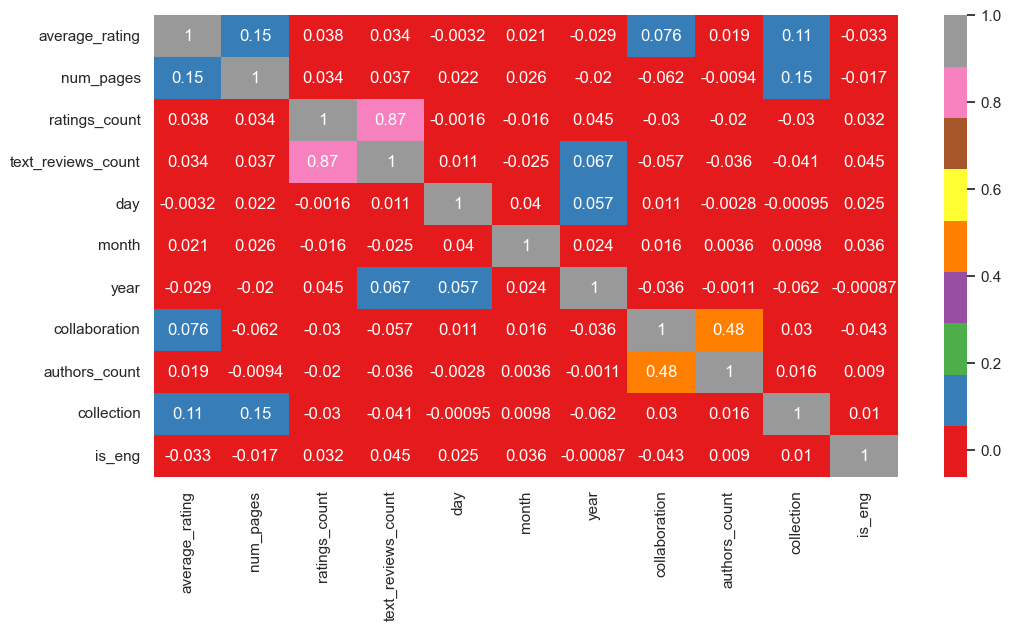

In [50]:
cor = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

None of the variables is related to average_rating, which is good.

### Part 4 | Model training

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11098 entries, 1 to 45641
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      11098 non-null  float64
 1   num_pages           11098 non-null  int64  
 2   ratings_count       11098 non-null  int64  
 3   text_reviews_count  11098 non-null  int64  
 4   day                 11098 non-null  int64  
 5   month               11098 non-null  int64  
 6   year                11098 non-null  int64  
 7   collaboration       11098 non-null  bool   
 8   authors_count       11098 non-null  int64  
 9   collection          11098 non-null  bool   
 10  lang_code_new       11098 non-null  object 
 11  type                11098 non-null  object 
 12  is_eng              11098 non-null  bool   
 13  publisher_size      11098 non-null  object 
 14  author_class        11098 non-null  object 
dtypes: bool(3), float64(1), int64(7), object(4)
memory usage: 

In [53]:
df_dummy = pd.get_dummies(df, dummy_na=False, sparse=False, drop_first=True)
df_dummy

average_rating  num_pages  ratings_count  text_reviews_count  day  \
bookID                                                                      
1                 4.57        652        2095690               27591   16   
2                 4.49        870        2153167               29221    1   
4                 4.42        352           6333                 244    1   
5                 4.56        435        2339585               36325    1   
8                 4.78       2690          41428                 164   13   
...                ...        ...            ...                 ...  ...   
45631             4.06        512            156                  20   21   
45633             4.08        635            783                  56    1   
45634             3.96        415            820                  95    1   
45639             3.72        434            769                 139   27   
45641             3.91        272            113                  12   28   

        month  year  collaboration  authors_count  collection  ...  \
bookID                                                         ...   
1           9  2006           True              2       False  ...   
2           9  2004           True              2       False  ...   
4          11  2003          False              1       False  ...   
5           5  2004           True              2       False  ...   
8           9  2004           True              2        True  ...   
...       ...   ...            ...            ...         ...  ...   
45631      12  2004           True              3       False  ...   
45633      12  1988          False              1       False  ...   
45634       8  1993          False              1       False  ...   
45639       2  2007          False              1       False  ...   
45641       5  2006          False              1       False  ...   

        type_others  type_poetry  type_romance  type_young-adult  \
bookID                                                             
1                 0            0             0                 0   
2                 0            0             0                 0   
4                 0            0             0                 0   
5                 0            0             0                 0   
8                 0            0             0                 0   
...             ...          ...           ...               ...   
45631             0            0             0                 0   
45633             0            0             0                 0   
45634             0            0             0                 0   
45639             0            0             0                 0   
45641             0            0             0                 0   

        publisher_size_medium  publisher_size_small  \
bookID                                                
1                           0                     0   
2                           0                     0   
4                           0                     0   
5                           0                     0   
8                           0                     0   
...                       ...                   ...   
45631                       1                     0   
45633                       0                     0   
45634                       0                     0   
45639                       1                     0   
45641                       0                     1   

        publisher_size_unique publication  author_class_famous  \
bookID                                                           
1                                       0                    1   
2                                       0                    1   
4                                       0                    1   
5                                       0                    1   
8                                       0                    1   
...                             

#### Linear Regression

RMSE: 0.2868333182070426


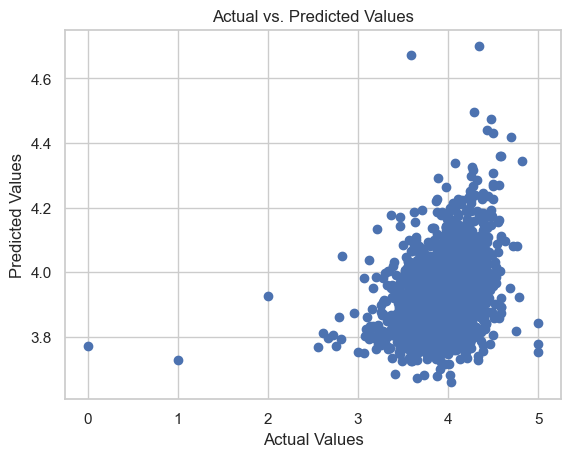

[3.80573528 3.97916397 4.00684905 4.03513855 3.9540803  3.95051017
 4.04199692 3.822424   4.0498328  3.92710613 3.87738763 3.84226689
 4.0468196  3.99016661 3.9921554  3.78642809 4.11689572 3.99015355
 3.84169423 3.8598814  3.90845547 3.84465968 3.76723483 4.01470274
 3.9504991  3.94930763 3.88102713 3.9421272  3.84791761 4.06696359]


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Separate the target variable from the data entry parameters
X = df_dummy.drop(columns=['average_rating'])
y = df_dummy['average_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Visualization of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# We make a new prediction for 30 new values
X_new = X.sample(n=30)
predictions = model.predict(X_new)
print(predictions)

The model is not bad, but the predictions are for good publications only, ratings going from 3.8 to 4.6

#### Improving the model

There are no categorical variables since we convert everything to dummys.

In [55]:
# Simple imputer for datetime columns (e.g., fill NaNs with median for simplicity)
def simple_imputer(X):
    return X.fillna(X.median())

datetime_features = ['day', 'month', 'year']
datetime_transformer = FunctionTransformer(simple_imputer, validate=False)

# Assume numerical transformation is scaling (you can replace this with any other transformation if required)
def scale(X):
    std_dev = X.std()
    if (std_dev == 0).all():
        return X - X.mean()
    return (X - X.mean()) / std_dev

numerical_features = ['num_pages', 'ratings_count', 'text_reviews_count', 'authors_count', 'collaboration', 'collection', 'is_eng']
numerical_transformer = FunctionTransformer(scale, validate=False)

# Assembling the Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('date', datetime_transformer, datetime_features),
        ('num', numerical_transformer, numerical_features),
    ],
    remainder='passthrough'
)

In [56]:
random.seed(42)

X = df_dummy.drop('average_rating', axis=1)
y = df_dummy['average_rating']

# Split into train and temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split temp into validate and test
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

In [57]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

# Create different pipelines for different models
pipelines = {
    'xgb': Pipeline([
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(random_state=42))
    ]),
    'rf': Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'lasso': Pipeline([
        ('preprocessor', preprocessor),
        ('model', Lasso(random_state=42))
    ])
}

In [58]:
param_grids = {
    'xgb': {
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [4, 6, 8],
        'model__subsample': [0.7, 0.8, 0.9],
        'model__colsample_bytree': [0.7, 0.8, 0.9],
        'model__min_child_weight': [1, 3, 5]
    },
    'rf': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'lasso': {
        'model__alpha': [0.0001, 0.001, 0.01]
    }
}

In [59]:
best_estimators = {}
best_scores = {}

for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, n_jobs=-1,verbose=10)
    grid_search.fit(X_train, y_train)
    
    best_estimators[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    print(f"{model_name}: {grid_search.best_score_}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV 2/3; 2/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8
[CV 2/3; 2/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8;, score=-5.081 total time=   0.5s
[CV 3/3; 3/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.9
[CV 3/3; 3/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.9;, score=0.079 total time=   0.4s
[CV 2/3; 6/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.9
[CV 2/3; 6/729] EN

[CV 3/3; 1/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 3/3; 1/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7;, score=0.074 total time=   0.5s
[CV 2/3; 5/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8
[CV 2/3; 5/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8;, score=-7.377 total time=   0.9s
[CV 3/3; 8/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.8
[CV 3/3; 8/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model_

[CV 2/3; 1/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 2/3; 1/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7;, score=-4.180 total time=   0.5s
[CV 1/3; 5/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8
[CV 1/3; 5/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8;, score=0.077 total time=   0.9s
[CV 3/3; 6/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.9
[CV 3/3; 6/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model_

[CV 3/3; 21/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.9
[CV 3/3; 21/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.9;, score=0.079 total time=   0.4s
[CV 3/3; 23/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.8
[CV 3/3; 23/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.8;, score=0.078 total time=   0.9s
[CV 3/3; 26/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.8
[CV 3/3; 26/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, m

[CV 2/3; 3/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.9
[CV 2/3; 3/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.9;, score=-5.287 total time=   0.4s
[CV 1/3; 6/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.9
[CV 1/3; 6/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.9;, score=0.069 total time=   0.9s
[CV 2/3; 7/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7
[CV 2/3; 7/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model_

[CV 1/3; 1/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 1/3; 1/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7;, score=0.108 total time=   0.5s
[CV 3/3; 4/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7
[CV 3/3; 4/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7;, score=0.070 total time=   0.9s
[CV 1/3; 8/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.8
[CV 1/3; 8/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__

[CV 1/3; 2/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8
[CV 1/3; 2/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8;, score=0.103 total time=   0.5s
[CV 3/3; 5/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8
[CV 3/3; 5/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8;, score=0.074 total time=   0.9s
[CV 2/3; 8/729] START model__colsample_bytree=0.7, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.8
[CV 2/3; 8/729] END model__colsample_bytree=0.7, model__learning_rate=0.05, model__

[CV 3/3; 109/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 3/3; 109/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7;, score=0.070 total time=   1.0s
[CV 2/3; 112/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7
[CV 2/3; 112/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7;, score=-6.119 total time=   2.0s
[CV 1/3; 115/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 115/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, 

[CV 2/3; 118/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7
[CV 2/3; 118/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7;, score=-5.251 total time=   0.9s
[CV 2/3; 120/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9
[CV 2/3; 120/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9;, score=-6.418 total time=   0.9s
[CV 1/3; 123/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9
[CV 1/3; 123/729] END model__colsample_bytree=0.7, model__learning_rate=0.1,

[CV 2/3; 119/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8
[CV 2/3; 119/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8;, score=-6.300 total time=   0.8s
[CV 1/3; 121/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 121/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7;, score=-0.003 total time=   1.7s
[CV 3/3; 123/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9
[CV 3/3; 123/729] END model__colsample_bytree=0.7, model__learning_rate=0.1,

[CV 1/3; 119/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8
[CV 1/3; 119/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8;, score=0.065 total time=   0.8s
[CV 3/3; 121/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7
[CV 3/3; 121/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7;, score=0.061 total time=   1.7s
[CV 1/3; 124/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 124/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, m

[CV 1/3; 107/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.8
[CV 1/3; 107/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.8;, score=-0.011 total time=   2.0s
[CV 1/3; 110/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8
[CV 1/3; 110/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8;, score=0.086 total time=   1.0s
[CV 1/3; 112/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 112/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, 

[CV 3/3; 120/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9
[CV 3/3; 120/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9;, score=0.067 total time=   0.8s
[CV 3/3; 122/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.8
[CV 3/3; 122/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.8;, score=0.067 total time=   1.7s
[CV 3/3; 125/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.8
[CV 3/3; 125/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, m

[CV 3/3; 119/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8
[CV 3/3; 119/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8;, score=0.074 total time=   0.8s
[CV 2/3; 121/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7
[CV 2/3; 121/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7;, score=-6.550 total time=   1.8s
[CV 2/3; 124/729] START model__colsample_bytree=0.7, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.7
[CV 2/3; 124/729] END model__colsample_bytree=0.7, model__learning_rate=0.1, 

[CV 2/3; 218/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8
[CV 2/3; 218/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8;, score=-7.461 total time=   1.1s
[CV 3/3; 220/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7
[CV 3/3; 220/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7;, score=0.007 total time=   2.6s
[CV 1/3; 223/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 223/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, 

[CV 2/3; 234/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.9
[CV 2/3; 234/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.9;, score=-8.826 total time=   3.4s
[CV 3/3; 238/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7
[CV 3/3; 238/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7;, score=-0.012 total time=   2.2s
[CV 1/3; 241/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 241/729] END model__colsample_bytree=0.7, model__learning_rate=0.2,

[CV 1/3; 231/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9
[CV 1/3; 231/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9;, score=-0.008 total time=   2.2s
[CV 3/3; 233/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.8
[CV 3/3; 233/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.8;, score=-0.011 total time=   3.4s
[CV 2/3; 236/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.8
[CV 2/3; 236/729] END model__colsample_bytree=0.7, model__learning_rate=0.2,

[CV 1/3; 238/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 238/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7;, score=-0.062 total time=   2.2s
[CV 3/3; 240/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9
[CV 3/3; 240/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9;, score=0.023 total time=   2.1s
[CV 2/3; 243/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.9
[CV 2/3; 243/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, 

[CV 1/3; 227/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8
[CV 1/3; 227/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8;, score=-0.041 total time=   1.1s
[CV 1/3; 229/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 229/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7;, score=-0.051 total time=   2.4s
[CV 1/3; 232/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 232/729] END model__colsample_bytree=0.7, model__learning_rate=0.2,

[CV 2/3; 231/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9
[CV 2/3; 231/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9;, score=-8.727 total time=   2.2s
[CV 1/3; 234/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.9
[CV 1/3; 234/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.9;, score=-0.014 total time=   3.4s
[CV 2/3; 237/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.9
[CV 2/3; 237/729] END model__colsample_bytree=0.7, model__learning_rate=0.2,

[CV 3/3; 241/729] START model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7
[CV 3/3; 241/729] END model__colsample_bytree=0.7, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7;, score=-0.030 total time=   3.4s
[CV 2/3; 244/729] START model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 2/3; 244/729] END model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7;, score=-4.576 total time=   0.6s
[CV 1/3; 246/729] START model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.9
[CV 1/3; 246/729] END model__colsample_bytree=0.8, model__learning_rate=0

[CV 3/3; 349/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7
[CV 3/3; 349/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7;, score=0.071 total time=   2.0s
[CV 2/3; 352/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 2/3; 352/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7;, score=-7.468 total time=   1.0s
[CV 3/3; 354/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.9
[CV 3/3; 354/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, 

[CV 2/3; 412/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7;, score=-10.534 total time=   2.1s
[CV 3/3; 415/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7
[CV 3/3; 415/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7;, score=0.060 total time=   0.7s
[CV 2/3; 417/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9
[CV 2/3; 417/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9;, score=-8.591 total time=   0.7s
[CV 3/3; 419/729] START model__colsample_byt

[CV 3/3; 375/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9
[CV 3/3; 375/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9;, score=0.061 total time=   1.8s
[CV 2/3; 378/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.9
[CV 2/3; 378/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.9;, score=-9.506 total time=   2.7s
[CV 2/3; 382/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=8, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7
[CV 2/3; 382/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, 

[CV 1/3; 348/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9
[CV 1/3; 348/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9;, score=0.006 total time=   1.3s
[CV 2/3; 350/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.8
[CV 2/3; 350/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.8;, score=-10.775 total time=   1.9s
[CV 1/3; 353/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8
[CV 1/3; 353/729] END model__colsample_bytree=0.8, model__learning_rate=0.1,

[CV 1/3; 349/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 349/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7;, score=-0.006 total time=   2.0s
[CV 1/3; 352/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 1/3; 352/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7;, score=0.056 total time=   0.9s
[CV 1/3; 354/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.9
[CV 1/3; 354/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, 

[CV 3/3; 350/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.8
[CV 3/3; 350/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.8;, score=0.074 total time=   1.9s
[CV 3/3; 352/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 3/3; 352/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7;, score=0.068 total time=   1.0s
[CV 1/3; 355/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 355/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, m

[CV 3/3; 351/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.9
[CV 3/3; 351/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.9;, score=0.075 total time=   1.8s
[CV 2/3; 356/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8
[CV 2/3; 356/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8;, score=-8.461 total time=   1.9s
[CV 1/3; 359/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=6, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.8
[CV 1/3; 359/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, 

[CV 1/3; 346/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 346/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7;, score=0.033 total time=   1.2s
[CV 3/3; 348/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9
[CV 3/3; 348/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9;, score=0.078 total time=   1.2s
[CV 2/3; 351/729] START model__colsample_bytree=0.8, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.9
[CV 2/3; 351/729] END model__colsample_bytree=0.8, model__learning_rate=0.1, m

[CV 1/3; 454/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 454/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7;, score=-0.037 total time=   1.9s
[CV 3/3; 456/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9
[CV 3/3; 456/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9;, score=0.039 total time=   1.8s
[CV 2/3; 459/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.9
[CV 2/3; 459/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, 

[CV 2/3; 453/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.9
[CV 2/3; 453/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.9;, score=-7.983 total time=   0.9s
[CV 3/3; 455/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.8
[CV 3/3; 455/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.8;, score=0.030 total time=   1.8s
[CV 2/3; 458/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=6, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.8
[CV 2/3; 458/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, 

[CV 1/3; 468/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.9
[CV 1/3; 468/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.9;, score=-0.037 total time=   3.8s
[CV 2/3; 470/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8
[CV 2/3; 470/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8;, score=-5.956 total time=   1.3s
[CV 2/3; 472/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7
[CV 2/3; 472/729] END model__colsample_bytree=0.8, model__learning_rate=0.2,

[CV 3/3; 464/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8
[CV 3/3; 464/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.8;, score=0.028 total time=   2.6s
[CV 1/3; 467/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.8
[CV 1/3; 467/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.8;, score=0.007 total time=   3.9s
[CV 3/3; 469/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7
[CV 3/3; 469/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, m

[CV 1/3; 528/729] START model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9
[CV 1/3; 528/729] END model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=6, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9;, score=0.032 total time=   2.1s
[CV 3/3; 530/729] START model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=6, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.8
[CV 3/3; 530/729] END model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=6, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.8;, score=0.075 total time=   3.1s
[CV 2/3; 533/729] START model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=6, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.8
[CV 2/3; 533/729] END model__colsample_bytree=0.9, model__learning_rate=0

[CV 1/3; 493/729] START model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 493/729] END model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7;, score=0.054 total time=   2.3s
[CV 3/3; 495/729] START model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.9
[CV 3/3; 495/729] END model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.9;, score=0.085 total time=   2.4s
[CV 2/3; 501/729] START model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.9
[CV 2/3; 501/729] END model__colsample_bytree=0.9, model__learning_rate=0

[CV 2/3; 471/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9
[CV 2/3; 471/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9;, score=-7.145 total time=   1.3s
[CV 3/3; 473/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.8
[CV 3/3; 473/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.8;, score=0.026 total time=   2.5s
[CV 2/3; 476/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.8
[CV 2/3; 476/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, 

[CV 2/3; 466/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7
[CV 2/3; 466/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7;, score=-6.882 total time=   4.0s
[CV 1/3; 469/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7
[CV 1/3; 469/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7;, score=0.016 total time=   1.3s
[CV 1/3; 471/729] START model__colsample_bytree=0.8, model__learning_rate=0.2, model__max_depth=8, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9
[CV 1/3; 471/729] END model__colsample_bytree=0.8, model__learning_rate=0.2, 

xgb: -1.1504738833654378
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 3/3; 571/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7
[CV 3/3; 571/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7;, score=0.071 total time=   1.5s
[CV 1/3; 574/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 574/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subsample=0.7;, score=0.022 total time=   2.6s
[CV 3/3; 576/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=300, model__subs

[CV 3/3; 562/729] START model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=8, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7
[CV 3/3; 562/729] END model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=8, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7;, score=0.083 total time=   2.8s
[CV 2/3; 565/729] START model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=8, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7
[CV 2/3; 565/729] END model__colsample_bytree=0.9, model__learning_rate=0.05, model__max_depth=8, model__min_child_weight=5, model__n_estimators=300, model__subsample=0.7;, score=-8.080 total time=   4.2s
[CV 1/3; 568/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.7
[CV 1/3; 568/729] END model__colsample_bytree=0.9, model__learning_rate=0

[CV 2/3; 577/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7
[CV 2/3; 577/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7;, score=-6.195 total time=   0.7s
[CV 3/3; 578/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8
[CV 3/3; 578/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8;, score=0.075 total time=   0.8s
[CV 1/3; 581/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.8
[CV 1/3; 581/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, 

[CV 2/3; 569/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8
[CV 2/3; 569/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8;, score=-8.174 total time=   0.7s
[CV 1/3; 571/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 571/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.7;, score=0.033 total time=   1.5s
[CV 2/3; 573/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=1, model__n_estimators=200, model__subsample=0.9
[CV 2/3; 573/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, 

[CV 1/3; 579/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9
[CV 1/3; 579/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.9;, score=0.074 total time=   0.8s
[CV 3/3; 581/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.8
[CV 3/3; 581/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.8;, score=0.078 total time=   1.4s
[CV 1/3; 584/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.8
[CV 1/3; 584/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, m

[CV 1/3; 577/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7
[CV 1/3; 577/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.7;, score=0.073 total time=   0.7s
[CV 2/3; 578/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8
[CV 2/3; 578/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=100, model__subsample=0.8;, score=-6.665 total time=   0.8s
[CV 3/3; 580/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=200, model__subsample=0.7
[CV 3/3; 580/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, 

[CV 1/3; 583/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.7
[CV 1/3; 583/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.7;, score=-0.002 total time=   2.1s
[CV 3/3; 585/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.9
[CV 3/3; 585/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=3, model__n_estimators=300, model__subsample=0.9;, score=0.081 total time=   2.1s
[CV 2/3; 591/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9
[CV 2/3; 591/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, 

[CV 3/3; 586/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.7
[CV 3/3; 586/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=100, model__subsample=0.7;, score=0.069 total time=   0.7s
[CV 1/3; 589/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7
[CV 1/3; 589/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.7;, score=0.021 total time=   1.6s
[CV 3/3; 591/729] START model__colsample_bytree=0.9, model__learning_rate=0.1, model__max_depth=4, model__min_child_weight=5, model__n_estimators=200, model__subsample=0.9
[CV 3/3; 591/729] END model__colsample_bytree=0.9, model__learning_rate=0.1, m

rf: -1.258802586637098
Fitting 3 folds for each of 3 candidates, totalling 9 fits
lasso: 0.08073339309566048


In [60]:
# Evaluate the best model (based on cross-validation score)
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_estimators[best_model_name]

y_pred = best_model.predict(X_validate)
mse = mean_squared_error(y_validate, y_pred)
mae = mean_absolute_error(y_validate, y_pred)

print(f"Best Model: {best_model_name}")
print("MSE:", mse)
print("MAE:", mae)

Best Model: lasso
MSE: 0.09970528034782784
MAE: 0.21616672157292846


These results indicate reasonably good performance.

In [61]:
# Evaluate on test set
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Test MSE for {best_model_name}: {mse_test}")
print(f"Test MAE for {best_model_name}: {mae_test}")

Test MSE for lasso: 0.11206917914230977
Test MAE for lasso: 0.21739666541024258


A test MSE of 0.1121 suggests that, on average, the Lasso model's predictions are relatively close to the actual values in the test data.
A test MAE of 0.2174 means that the Lasso model's predictions are about 0.2174 units away from the actual values on average in the test data.

In [99]:
# Evaluate the best model (based on cross-validation score)
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_estimators[best_model_name]

y_pred = best_model.predict(X_validate)
mse = mean_squared_error(y_validate, y_pred)
mae = mean_absolute_error(y_validate, y_pred)

print(f"Best Model: {best_model_name}")
print("MSE:", mse)
print("MAE:", mae)

# Evaluate on test set
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Test MSE for {best_model_name}: {mse_test}")
print(f"Test MAE for {best_model_name}: {mae_test}")


Best Model: lasso
MSE: 0.09970528034782784
MAE: 0.21616672157292846
Test MSE for lasso: 0.11206917914230977
Test MAE for lasso: 0.21739666541024258


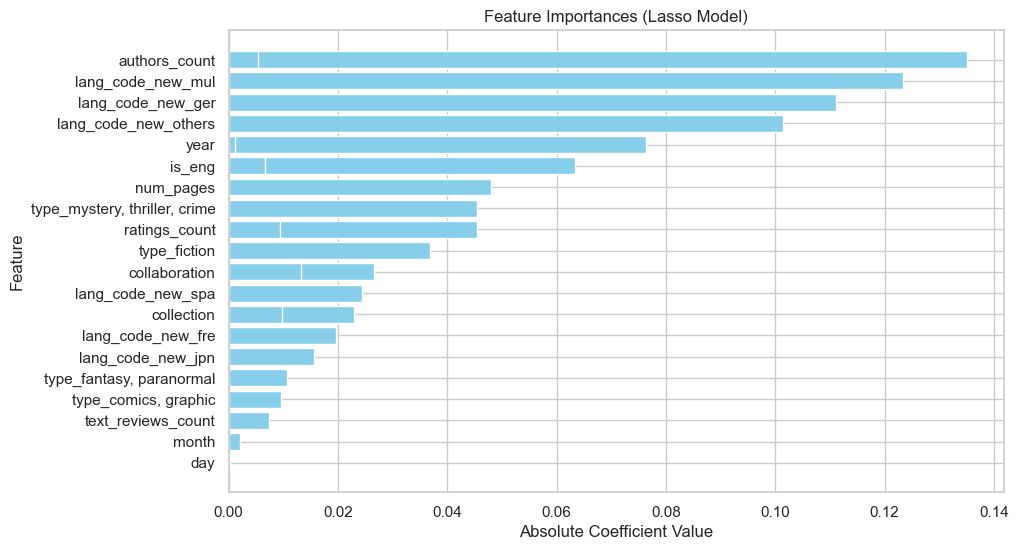

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Get the Lasso model from the pipeline
lasso_model = best_model.named_steps['model']

# Get the selected feature indices (features with non-zero coefficients)
selected_feature_indices = np.where(lasso_model.coef_ != 0)[0]

# Get the corresponding feature names from the original feature list
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Get the coefficients for the selected features
lasso_coefs = lasso_model.coef_[selected_feature_indices]

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': lasso_coefs})

# Sort the features by their absolute coefficient values for better visualization
feature_importance_df['Absolute_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances (Lasso Model)')
plt.gca().invert_yaxis()  # Reverse the order to have the most important features at the top
plt.show()


In [104]:
# Save the best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

### Part 5 | Conclusions

Based on the available data, it appears that in order to accurately predict the average rating for each book, we should incorporate additional variables. By increasing both the number of data points and the variables, we introduce greater diversity into the average rating, which depends on various other factors. This, in turn, allows for the creation of more models capable of capturing a broader range of variability and patterns associated with the target variable, which is the average rating. Additionally, it's worth noting that since most of the ratings are above 3.5, the predictions are likely to be positive as well.